## Chemical producer

### data
Time series data of 2024. Frequency = 1h.
There are 6 reactors. Each reactor has its input values. There are some variables common for all reactors, but these are not inputs. 

### objective
predict outputs:
- CB (the product)
- SO2
- CO2
- Dampfmenge (steam)
- Rauchgasmenge (tail gas, all reactors combined)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [2]:
df = pd.read_csv("data/Daten_juna.csv",sep=",")
df = df.iloc[1:,:] # remove first row, there are two headers

/tmp/ipykernel_53967/300490096.py:1: DtypeWarning: Columns (1,2,4,5,7,8,10,11,17,18,19,20,21,22,23,24,25,26,28,31,32,38,39,40,41,42,43,44,46,47,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,71,73,74,80,81,82,83,84,85,86,87,88,89,92,94,95,101,102,103,104,105,106,107,108,109,110,112,113,115,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,145,146,147,148,149,150) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Daten_juna.csv",sep=",")


In [4]:
df.columns.values

array(['Bezeichnung', '2|CB', '2|Erdgas', '2|Konst.Stufe', '2|Perlwasser',
       '2|Regelstufe', '2|Sorte', '2|V-Luft', '2|VL Temp', '2|Fuelöl',
       '2|Makeöl', '2|Makeöl|Temperatur', '2|Makeöl|Ventil', '2|CCT',
       '2|CTD', '2|FCC', '2|SCT', '2|C', '2|H', '2|N', '2|O', '2|S',
       '3|CB', '3|Erdgas', '3|Konst.Stufe', '3|Perlwasser',
       '3|Regelstufe', '3|Sorte', '3|V-Luft', '3|VL Temp', '3|Fuelöl',
       '3|Makeöl', '3|Makeöl|Temperatur', '3|Makeöl|Ventil', '3|CCT',
       '3|CTD', '3|FCC', '3|SCT', '3|C', '3|H', '3|N', '3|O', '3|S',
       '4|CB', '4|Erdgas', '4|Konst.Stufe', '4|Perlwasser',
       '4|Regelstufe', '4|Sorte', '4|V-Luft', '4|VL Temp', '4|Fuelöl',
       '4|Makeöl', '4|Makeöl|Temperatur', '4|Makeöl|Ventil', '4|CCT',
       '4|CTD', '4|FCC', '4|SCT', '4|C', '4|H', '4|N', '4|O', '4|S',
       '5|CB', '5|Erdgas', '5|Konst.Stufe', '5|Perlwasser',
       '5|Regelstufe', '5|Sorte', '5|V-Luft', '5|VL Temp', '5|Fuelöl',
       '5|Makeöl', '5|Makeöl|Temperatur', '5

In [63]:
df.dtypes

Bezeichnung      object
2|CB             object
2|Erdgas         object
2|Konst.Stufe    object
2|Perlwasser     object
                  ...  
R3 SO2           object
R4 SO2           object
R5 SO2           object
R6 SO2           object
R7 SO2           object
Length: 151, dtype: object

In [64]:
nan_counts = df.isna().sum()
print("\nCount of NaN values in each column:")
print(nan_counts)
print ("\nTotal NaN values: {}".format(sum(nan_counts)))


Count of NaN values in each column:
Bezeichnung      0
2|CB             0
2|Erdgas         0
2|Konst.Stufe    0
2|Perlwasser     0
                ..
R3 SO2           0
R4 SO2           0
R5 SO2           0
R6 SO2           0
R7 SO2           0
Length: 151, dtype: int64

Total NaN values: 0


In [65]:
def safe_numeric_convert(series):
    try:
        return pd.to_numeric(series)
    except ValueError:
        return series
for col in df.columns:
    df[col] = safe_numeric_convert(df[col])
    print(f"{col:<20}{df[col].dtype}")

Bezeichnung         object
2|CB                float64
2|Erdgas            float64
2|Konst.Stufe       object
2|Perlwasser        object
2|Regelstufe        float64
2|Sorte             object
2|V-Luft            float64
2|VL Temp           float64
2|Fuelöl            object
2|Makeöl            float64
2|Makeöl|Temperatur float64
2|Makeöl|Ventil     object
2|CCT               object
2|CTD               object
2|FCC               object
2|SCT               object
2|C                 float64
2|H                 float64
2|N                 float64
2|O                 float64
2|S                 float64
3|CB                float64
3|Erdgas            float64
3|Konst.Stufe       float64
3|Perlwasser        object
3|Regelstufe        float64
3|Sorte             object
3|V-Luft            float64
3|VL Temp           object
3|Fuelöl            object
3|Makeöl            float64
3|Makeöl|Temperatur float64
3|Makeöl|Ventil     object
3|CCT               object
3|CTD               object
3|FCC    

In [66]:
print (df["R2 CO2"].values.tolist())
non_numeric = df[pd.to_numeric(df["R2 CO2"], errors='coerce').isna() & df["R2 CO2"].notna()]
print (non_numeric)

['3024.18', '3005.27', '3005.03', '3011.89', '3009.69', '3044.48', '3012.36', '3033.45', '3015.83', '3004.63', '3014.92', '3013.94', '3014.41', '3016.61', '3014.35', '3030.13', '2993.72', '2957.16', '2943.71', '2953.86', '2988.43', '2955.07', '2977.02', '2971.82', '2982.11', '2970.43', '2970.56', '2986.95', '2973.25', '2955.43', '2971.98', '2990.66', '2966.99', '2967.49', '2962.07', '2949.36', '2988.80', '2986.56', '2970.20', '2959.68', '3003.00', '2953.25', '2980.32', '2963.88', '2964.53', '2970.02', '2972.82', '2946.05', '2952.15', '2987.29', '2977.21', '2970.43', '2982.49', '2977.55', '3004.23', '2996.69', '2979.82', '2971.78', '2990.21', '2993.35', '2968.57', '2959.87', '2964.41', '2960.94', '3030.07', '3059.63', '3020.62', '3036.45', '3053.92', '3019.26', '3064.44', '3063.55', '3055.38', '3006.86', '3051.55', '3054.37', '3042.53', '3033.65', '3005.86', '3009.83', '3024.95', '3005.22', '3027.41', '3057.68', '2995.56', '2975.27', '2988.84', '2948.37', '2951.31', '2990.12', '2952.96'

In [67]:
def count_non_numeric(series):
    return pd.to_numeric(series, errors='coerce').isna().sum()

# Count non-numeric values in each column
non_numeric_counts = df.apply(count_non_numeric)

# Filter columns with non-zero counts and sort in descending order
non_numeric_columns = non_numeric_counts[non_numeric_counts > 0].sort_values(ascending=False)

print("Columns with non-numeric values:")
for column, count in non_numeric_columns.items():
    print(f"{column:<30}\t{count:>10} non-numeric values")

print(f"\nTotal columns with non-numeric values: {len(non_numeric_columns)}")
print(f"Total non-numeric values across all columns: {non_numeric_counts.sum()}")


Columns with non-numeric values:
Bezeichnung                   	      6287 non-numeric values
6|Sorte                       	      6287 non-numeric values
2|Sorte                       	      6287 non-numeric values
7|Sorte                       	      6287 non-numeric values
4|Sorte                       	      6287 non-numeric values
5|Sorte                       	      6287 non-numeric values
3|Sorte                       	      6287 non-numeric values
4|Perlwasser                  	       194 non-numeric values
LT7|S                         	       100 non-numeric values
2|FCC                         	        65 non-numeric values
2|SCT                         	        65 non-numeric values
2|CTD                         	        65 non-numeric values
2|CCT                         	        65 non-numeric values
3|SCT                         	        64 non-numeric values
5|CCT                         	        64 non-numeric values
5|CTD                         	        64 non-numeri

In [68]:
# Let's check the values that could not be converted to numeric

list_of_failed_measurements = []

def check_non_numeric(series):
    print (series.name)
    non_numeric = series[pd.to_numeric(series, errors='coerce').isna() & series.notna()]
    return (len(non_numeric),set(non_numeric)),list(set(non_numeric))

non_numeric,values = check_non_numeric(df["R2 CO2"])
list_of_failed_measurements.extend(values)
print (non_numeric)

non_numeric,values = check_non_numeric(df["3|Fuelöl"])
list_of_failed_measurements.extend(values)
print (non_numeric)

non_numeric,values = check_non_numeric(df["2|CCT"])
list_of_failed_measurements.extend(values)
print (non_numeric)

non_numeric,values = check_non_numeric(df["LT7|S"])
list_of_failed_measurements.extend(values)
print (non_numeric)

non_numeric,values = check_non_numeric(df["4|Perlwasser"])
list_of_failed_measurements.extend(values)
print (non_numeric)


non_numeric,values = check_non_numeric(df["7|Konst.Stufe"])
list_of_failed_measurements.extend(values)
print (non_numeric)

print (list_of_failed_measurements)


R2 CO2
(1, {'#VALUE!'})
3|Fuelöl
(1, {'Calc Failed'})
2|CCT
(65, {"Data was not available for attribute 'CCT'."})
LT7|S
(100, {'Calc Failed', 'Set to Bad'})
4|Perlwasser
(194, {'Out of Serv'})
7|Konst.Stufe
(2, {'Bad'})
['#VALUE!', 'Calc Failed', "Data was not available for attribute 'CCT'.", 'Calc Failed', 'Set to Bad', 'Out of Serv', 'Bad']


In [69]:
# I will remove the rows that contain this values, because they are not many.
mask = df.isin(list_of_failed_measurements).any(axis=1)
df_cleaned = df[~mask]
rows_removed = mask.sum()
print(f"Rows removed: {rows_removed}")
print(f"Rows remaining: {len(df_cleaned)}")


Rows removed: 376
Rows remaining: 5911


In [70]:
# repeat the previous cell:

non_numeric_counts = df_cleaned.apply(count_non_numeric)

# Filter columns with non-zero counts and sort in descending order
non_numeric_columns = non_numeric_counts[non_numeric_counts > 0].sort_values(ascending=False)

print("Columns with non-numeric values:")
for column, count in non_numeric_columns.items():
    print(f"{column:<30}\t{count:>10} non-numeric values")

print(f"\nTotal columns with non-numeric values: {len(non_numeric_columns)}")
print(f"Total non-numeric values across all columns: {non_numeric_counts.sum()}")

Columns with non-numeric values:
Bezeichnung                   	      5911 non-numeric values
2|Sorte                       	      5911 non-numeric values
3|Sorte                       	      5911 non-numeric values
4|Sorte                       	      5911 non-numeric values
5|Sorte                       	      5911 non-numeric values
6|Sorte                       	      5911 non-numeric values
7|Sorte                       	      5911 non-numeric values

Total columns with non-numeric values: 7
Total non-numeric values across all columns: 41377


In [71]:
# conver dtypes again:

for col in df.columns:
    df_cleaned[col] = safe_numeric_convert(df_cleaned[col])
    print(f"{col:<20}{df_cleaned[col].dtype}")

Bezeichnung         object
2|CB                float64
2|Erdgas            float64
2|Konst.Stufe       float64
2|Perlwasser        float64
2|Regelstufe        float64
2|Sorte             object
2|V-Luft            float64
2|VL Temp           float64
2|Fuelöl            float64
2|Makeöl            float64
2|Makeöl|Temperatur float64
2|Makeöl|Ventil     float64
2|CCT               float64
2|CTD               float64
2|FCC               float64
2|SCT               float64
2|C                 float64
2|H                 float64
2|N                 float64
2|O                 float64
2|S                 float64
3|CB                float64
3|Erdgas            float64
3|Konst.Stufe       float64
3|Perlwasser        float64
3|Regelstufe        float64
3|Sorte             object
3|V-Luft            float64
3|VL Temp           float64
3|Fuelöl            float64
3|Makeöl            float64
3|Makeöl|Temperatur float64
3|Makeöl|Ventil     float64
3|CCT               float64
3|CTD               flo

/tmp/ipykernel_128938/1418637056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = safe_numeric_convert(df_cleaned[col])


In [72]:
df_cleaned.head(3)

Bezeichnung     2|CB  2|Erdgas  2|Konst.Stufe  2|Perlwasser  \
1  01/01/2024 00:00:00  2748.64    672.67            2.1       2860.80   
2  01/01/2024 01:00:00  2751.96    679.04            2.1       2860.80   
3  01/01/2024 02:00:00  2732.53    670.97            2.1       2858.62   

   2|Regelstufe 2|Sorte  2|V-Luft  2|VL Temp  2|Fuelöl  ...   R4 CO2  R5 CO2  \
1          2.21    N330  11530.01     663.02       0.0  ...  3383.80    0.46   
2          2.35    N330  11482.25     663.11       0.0  ...  3410.81    0.49   
3          2.25    N330  11511.82     660.31       0.0  ...  3411.83    0.53   

    R6 CO2   R7 CO2    R2 SO2    R3 SO2     R4 SO2  R5 SO2     R6 SO2  \
1  3260.24  2746.93  7.176400  4.960307  56.421569     0.0  60.049034   
2  3201.22  2729.93  7.158089  4.962595  56.602893     0.0  59.869563   
3  3235.99  2731.54  7.130636  4.958134  56.472307     0.0  59.959999   

      R7 SO2  
1  51.687002  
2  51.533843  
3  51.623491  

[3 rows x 151 columns]

In [73]:
df_cleaned.describe().round(0)

2|CB  2|Erdgas  2|Konst.Stufe  2|Perlwasser  2|Regelstufe  2|V-Luft  \
count  5911.0    5911.0         5911.0        5911.0        5911.0    5911.0   
mean   2367.0     555.0            2.0        2611.0           3.0   10235.0   
std     808.0     258.0            1.0         835.0           1.0    2914.0   
min       0.0       0.0            0.0          -2.0           0.0       0.0   
25%    2251.0     356.0            1.0        2520.0           2.0   10507.0   
50%    2540.0     680.0            2.0        2837.0           3.0   11072.0   
75%    2842.0     742.0            2.0        3078.0           3.0   11503.0   
max    3254.0     808.0            2.0        3742.0           5.0   12124.0   

       2|VL Temp  2|Fuelöl  2|Makeöl  2|Makeöl|Temperatur  ...  R4 CO2  \
count     5911.0    5911.0    5911.0               5911.0  ...  5911.0   
mean       643.0      92.0    3571.0                165.0  ...  2519.0   
std        136.0     192.0    1188.0                 34.0  ...  1231.0   
min         19.0      -1.0       0.0                 15.0  ...    -1.0   
25%        640.0       0.0    3492.0                179.0  ...  2821.0   
50%        686.0       0.0    3870.0                180.0  ...  3103.0   
75%        703.0       0.0    4203.0                180.0  ...  3214.0   
max        735.0     728.0    4764.0                197.0  ...  3453.0   

        R5 CO2  R6 CO2   R7 CO2  R2 SO2  R3 SO2  R4 SO2  R5 SO2  R6 SO2  \
count   5911.0  5911.0   5911.0  5911.0  5911.0  5911.0  5911.0  5911.0   
mean    2979.0  2632.0   4269.0     8.0     7.0    39.0    34.0    40.0   
std     3076.0  1096.0   3348.0     3.0     2.0    20.0    26.0    18.0   
min      -50.0    -1.0     -1.0     0.0     0.0     0.0     0.0     0.0   
25%      107.0  2872.0   2561.0     7.0     7.0    41.0     0.0    41.0   
50%     2681.0  3111.0   2820.0     8.0     8.0    47.0    45.0    47.0   
75%     3114.0  3191.0   7012.0     9.0     9.0    52.0    55.0    51.0   
max    11861.0  4622.0  12921.0    13.0    12.0    67.0    78.0    62.0   

       R7 SO2  
count  5911.0  
mean     40.0  
std      18.0  
min       0.0  
25%      35.0  
50%      46.0  
75%      51.0  
max      68.0  

[8 rows x 144 columns]

['KD|Dampfmenge', 'KD|Restgasmenge', 'KD|NOx', 'KD|Rauchgasmenge', 'KD|SO2', 'KE|Dampfmenge', 'KE|Restgasmenge', 'KE|NOx', 'KE|Rauchgasmenge', 'KE|SO2']


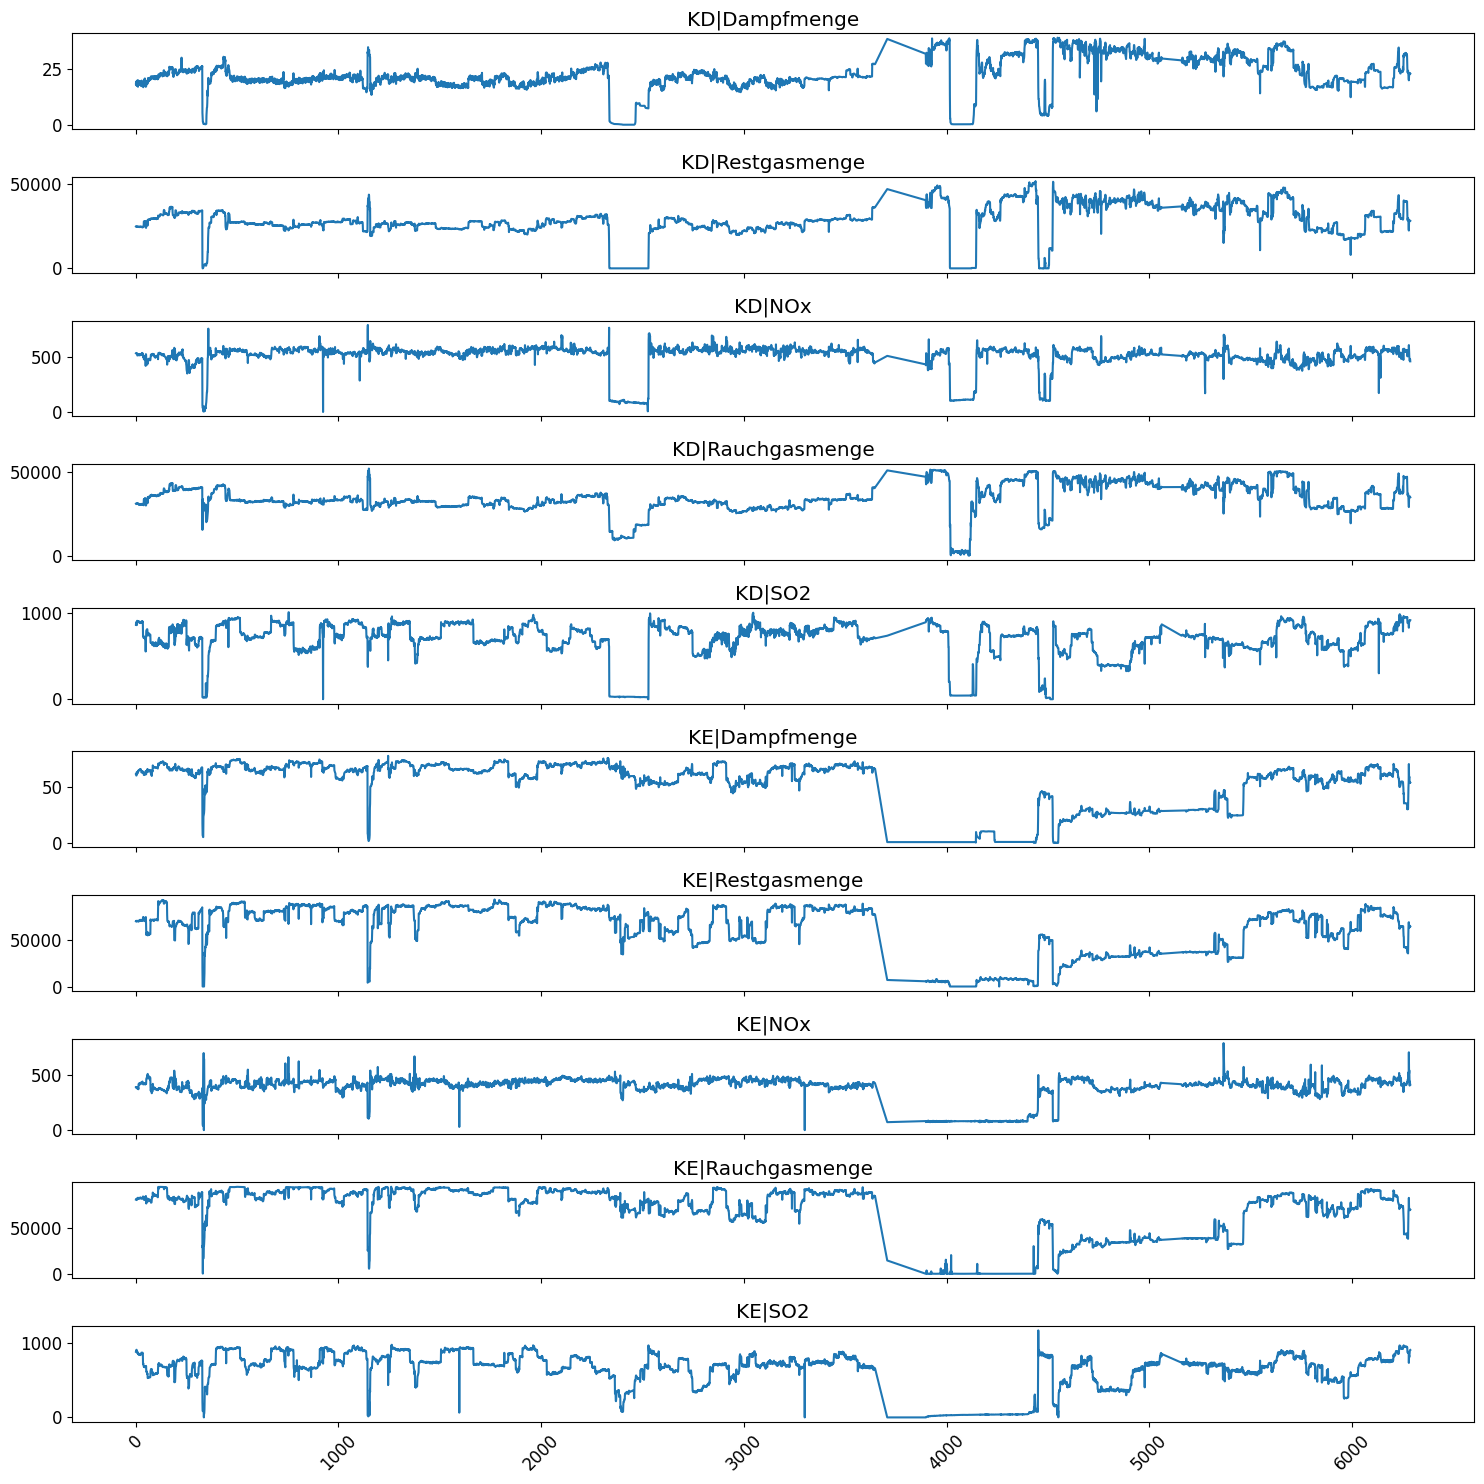

In [74]:
# Select only the float columns that start with "2" (Modify for the other reactors)
reactor = "2"
float_cols = [col for col in df_cleaned.columns if (col.startswith(reactor) or col.startswith("R"+reactor)) and df_cleaned[col].dtype == 'float64']
float_cols = [col for col in df_cleaned.columns if (col.startswith("KD") or col.startswith("KE")) and df_cleaned[col].dtype == 'float64']
print (float_cols)
n_plots = len(float_cols)

fig, axes = plt.subplots(n_plots, 1, figsize=(15, 1.5*n_plots), sharex=True)

# Ensure axes is always a list, even if there's only one plot
if n_plots == 1:
    axes = [axes]

#df_aux = df_cleaned.copy().iloc[1000:2000]
df_aux = df_cleaned.copy()

for i, col in enumerate(float_cols):
    #axes[i].scatter(df_aux.index, df_aux[col],s=1)
    axes[i].plot(df_aux[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [75]:
string_cols = [col for col in df_cleaned.columns if col.startswith("2") and df_cleaned[col].dtype == 'object']
print (float_cols)
print(string_cols)

['KD|Dampfmenge', 'KD|Restgasmenge', 'KD|NOx', 'KD|Rauchgasmenge', 'KD|SO2', 'KE|Dampfmenge', 'KE|Restgasmenge', 'KE|NOx', 'KE|Rauchgasmenge', 'KE|SO2']
['2|Sorte']


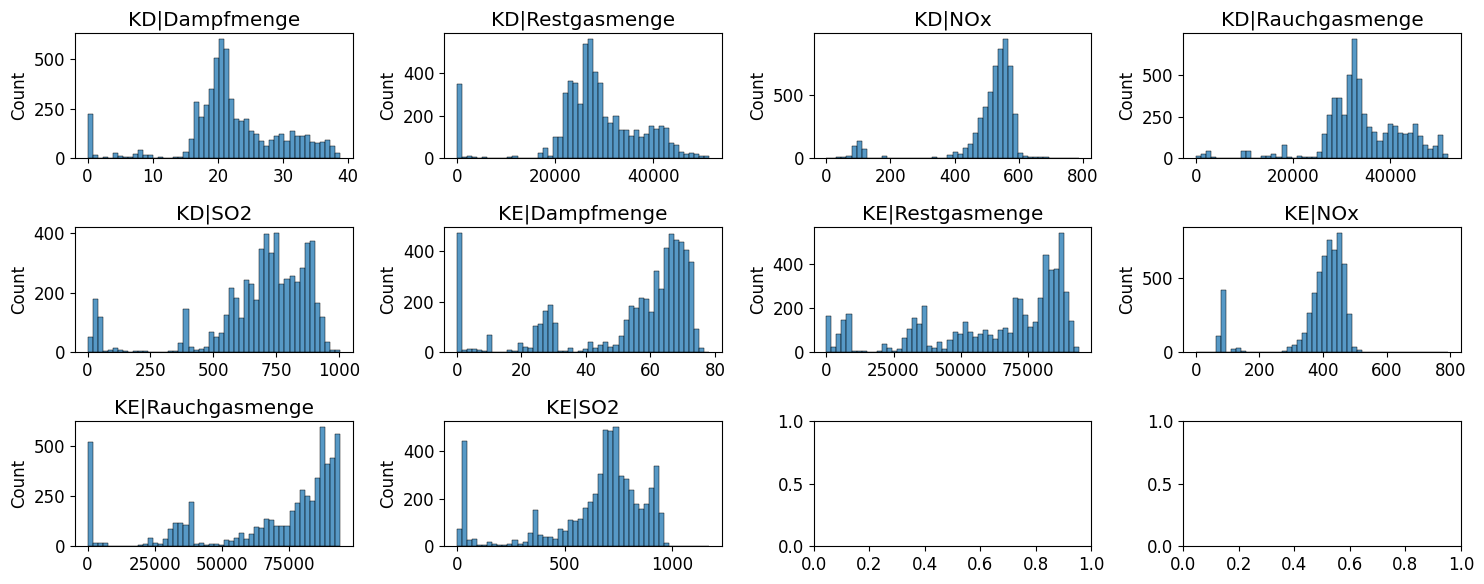

In [76]:
n_cols = 4
n_rows = math.ceil(len(float_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2*n_rows))
axes = axes.flatten()
plt.rcParams.update({'font.size': 12})

for i, col in enumerate(float_cols):
    sns.histplot(df_cleaned[col], bins=50, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()


In [77]:
df[string_cols].describe()

2|Sorte
count     6287
unique       7
top       N375
freq      1815

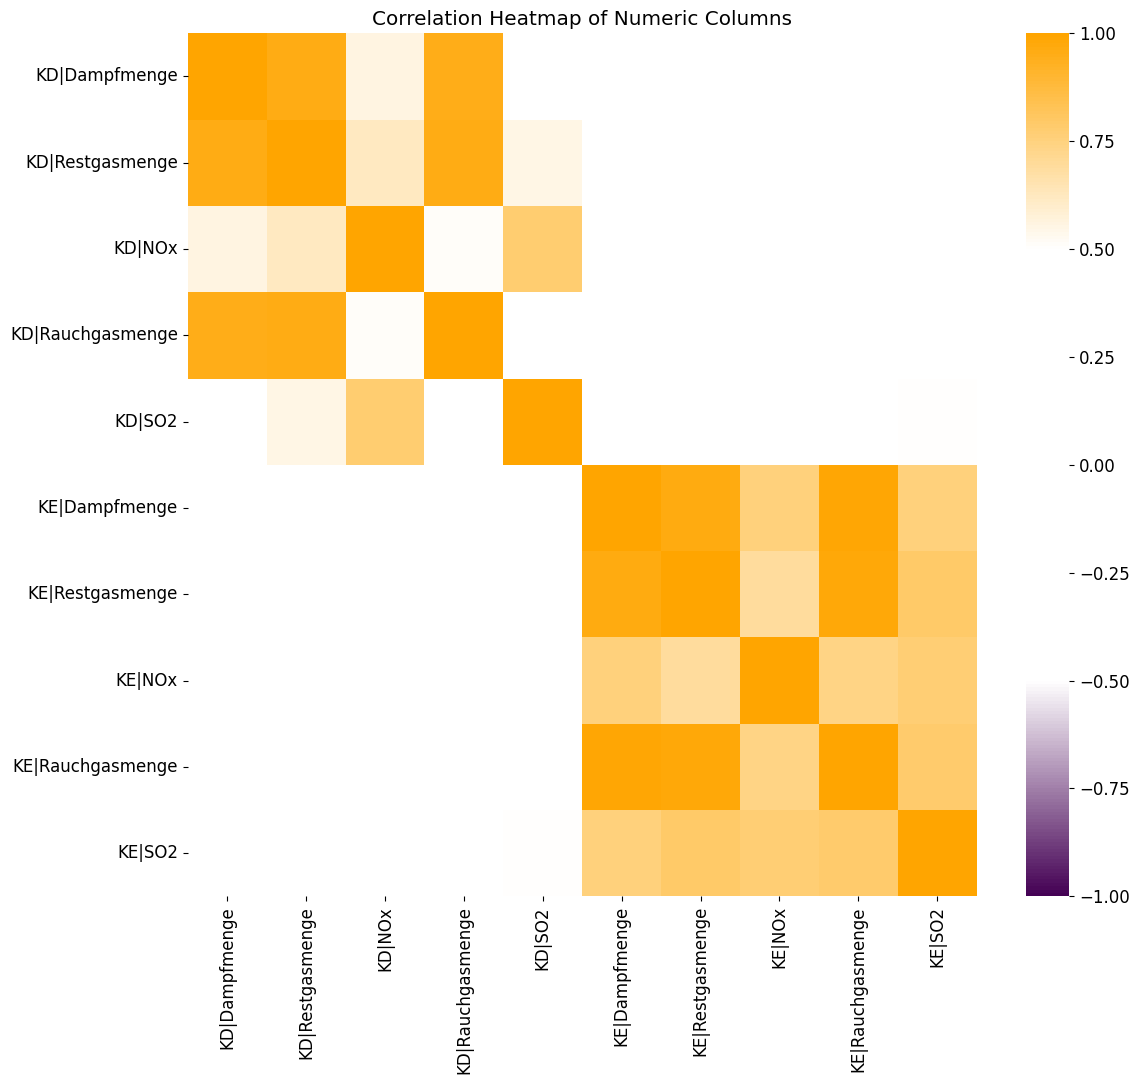

In [78]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

numeric_df = df_cleaned[float_cols]

corr_matrix = numeric_df.corr()

blue_r = LinearSegmentedColormap.from_list("", ["#440154", "white"])
red = LinearSegmentedColormap.from_list("", ["white", "orange"])

colors = np.vstack((blue_r(np.linspace(0, 1, 128)),
                    np.array([[1,1,1,1]]*255),  # White for the middle range
                    red(np.linspace(0, 1, 128))))
custom_cmap = ListedColormap(colors)

colors = ['#3B4CC0', '#FFFFFF', '#B40426']  # Blue, White, Red
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=n_bins)
    
# Create a heatmap
plt.figure(figsize=(12, 11))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap=custom_cmap, vmin=-1, vmax=1, center=0,annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

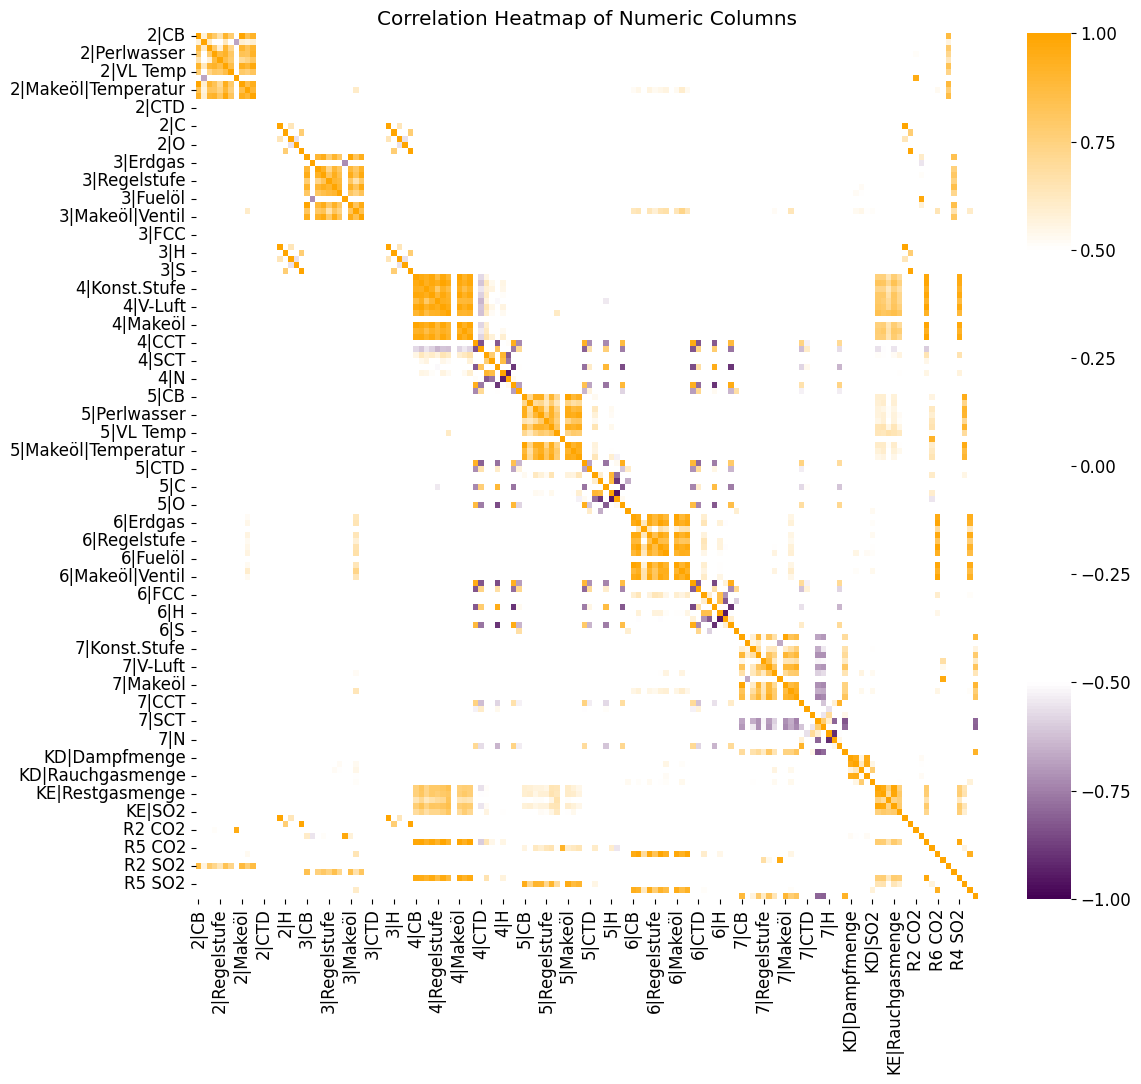

KD|Dampfmenge          1.000000
KD|Restgasmenge        0.955670
KD|Rauchgasmenge       0.950250
KD|NOx                 0.554957
R3 CO2                 0.520502
3|VL Temp              0.472722
3|Regelstufe           0.472081
3|Fuelöl               0.465517
3|CB                   0.452311
3|Makeöl|Temperatur    0.450469
6|VL Temp              0.442945
7|VL Temp              0.441367
KD|SO2                 0.438897
3|Makeöl               0.437805
3|Perlwasser           0.429638
3|V-Luft               0.423431
2|Makeöl|Temperatur    0.421403
3|Konst.Stufe          0.406376
7|Makeöl|Temperatur    0.406038
6|Makeöl|Temperatur    0.402913
7|V-Luft               0.402227
6|SCT                  0.398774
R7 SO2                 0.391244
2|CB                   0.389520
6|Regelstufe           0.387056
7|Regelstufe           0.379141
2|Makeöl               0.377449
3|Makeöl|Ventil        0.374855
7|Makeöl               0.373194
6|V-Luft               0.367224
7|CB                   0.357969
6|Perlwa

In [79]:
#float_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'float64' and not col.endswith("CCT") and not col.endswith("CTD") and not col.endswith("FCC") and not col.endswith("SCT")]
float_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'float64']
numeric_df = df_cleaned[float_cols]

corr_matrix = numeric_df.corr()

blue_r = LinearSegmentedColormap.from_list("", ["#440154", "white"])
red = LinearSegmentedColormap.from_list("", ["white", "orange"])

colors = np.vstack((blue_r(np.linspace(0, 1, 128)),
                    np.array([[1,1,1,1]]*255),  # White for the middle range
                    red(np.linspace(0, 1, 128))))
custom_cmap = ListedColormap(colors)

colors = ['#3B4CC0', '#FFFFFF', '#B40426']  # Blue, White, Red
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=n_bins)
    
# Create a heatmap
plt.figure(figsize=(12, 11))
sns.heatmap(corr_matrix, annot=False, cmap=custom_cmap, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

target_correlations = numeric_df.corr()["KD|Dampfmenge"].sort_values(ascending=False)
print (target_correlations.to_string())


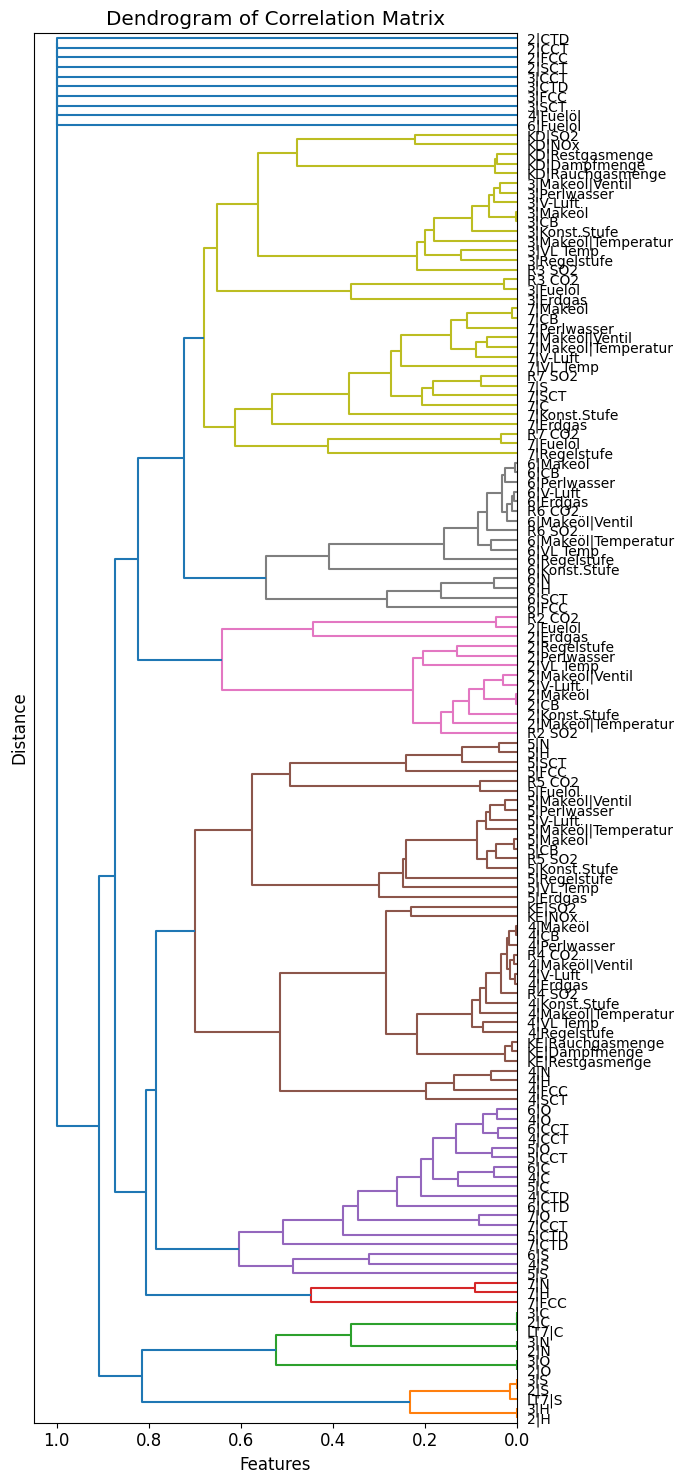

In [80]:

from scipy.cluster import hierarchy

#corr_matrix = np.round((corr_matrix + corr_matrix.T) / 2, decimals=8)

# Replace any non-finite values with 0
corr_matrix = np.nan_to_num(corr_matrix)

dist_matrix = np.round(1 - np.abs(corr_matrix), decimals=8)
dist_matrix = (dist_matrix + dist_matrix.T) / 2  # Ensure symmetry
dist_matrix = np.clip(dist_matrix, 0, 2)  # Ensure values are between 0 and 2

# Convert to condensed form
condensed_dist = dist_matrix[np.triu_indices(len(dist_matrix), k=1)]

# Replace any remaining non-finite values
if not np.all(np.isfinite(condensed_dist)):
    max_finite = np.max(condensed_dist[np.isfinite(condensed_dist)])
    condensed_dist[~np.isfinite(condensed_dist)] = max_finite

# Perform hierarchical clustering
linkage = hierarchy.linkage(condensed_dist, method='average')

# Create the dendrogram
plt.figure(figsize=(7, 15))
dendrogram = hierarchy.dendrogram(linkage, 
                                  labels=numeric_df.columns, 
                                  orientation='left',  # This makes it vertical
                                  leaf_font_size=10,   # Adjust label font size
                                  leaf_rotation=0)     # Rotate labels to horizontal
plt.title('Dendrogram of Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [81]:
# Feature importance
from sklearn.feature_selection import mutual_info_regression

def mutual_info_cb_score(series):
    #return mutual_info_regression(series.values.reshape(-1, 1), df_cleaned["2|CB"])[0]
    return mutual_info_regression(series.values.reshape(-1, 1), df_cleaned["KD|Dampfmenge"])[0]

mi = df_cleaned[float_cols].apply(mutual_info_cb_score)
mi = mi.sort_values(ascending=False)
print(mi)

KD|Dampfmenge       6.939334
KD|Restgasmenge     1.562619
KD|Rauchgasmenge    1.517301
4|C                 1.222764
7|C                 1.199439
                      ...   
3|CTD               0.000861
2|CCT               0.000000
2|FCC               0.000000
3|CCT               0.000000
3|FCC               0.000000
Length: 144, dtype: float64


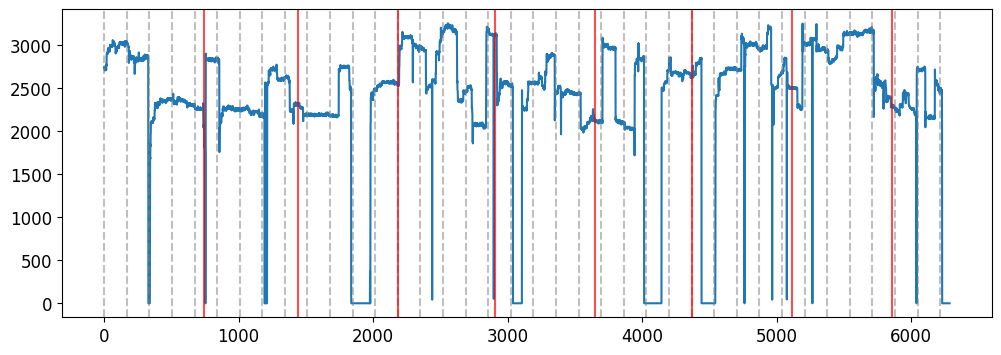

In [82]:
first_column = df["2|CB"].values.tolist()
first_column = [float(x) for x in first_column]           
fig, ax = plt.subplots(figsize=(12,4))
train_end = len(df)*0.6
val_end = train_end + len(df)*0.2
total_length = len(df)
ax.plot(first_column);
for i in range(0, df.shape[0], 168): #weeks
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
red_lines = [744, 1440, 2184, 2904, 3648, 4368, 5112, 5856] # months
for line in red_lines:
    ax.axvline(x=line, color='red', linestyle='-', alpha=0.7)

plt.show()

Mean of full training set: 21.403888771410443
Variance of full training set: 61.12437373345184
-----
Mean of test set: 25.604898477157363
Variance of full test set: 34.576478119980756
-----
Mean of test set [:400]: 29.745
Variance of full test set [:400]: 4.2068565
-----
Mean of test set [400:]: 23.48719948849105
Variance of full test set [400:]: 36.858673614935796


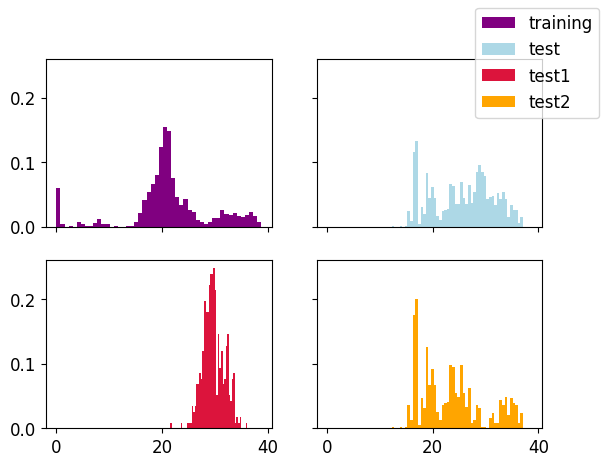

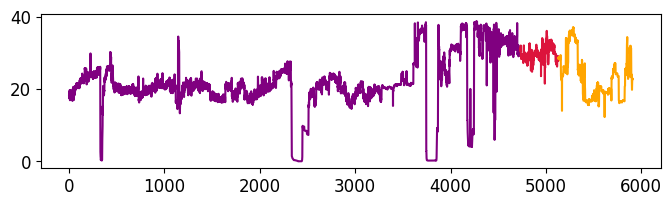

In [83]:
# I am gonna check the mean and variance of the test data

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True)
all_target_values = df_cleaned["KD|Dampfmenge"].values.tolist()
#print ("All values: {}".format(len(all_target_values)))
training_set = all_target_values[:round(len(all_target_values)*0.8)]
test_set = all_target_values[round(len(all_target_values)*0.8):]
print ("Mean of full training set: {}".format(np.mean(training_set)))
print ("Variance of full training set: {}".format(np.var(training_set)))
ax1.hist(training_set,bins=50, label="training", density=True, alpha=1, color="purple")
print ("-----")
print ("Mean of test set: {}".format(np.mean(test_set)))
print ("Variance of full test set: {}".format(np.var(test_set)))
ax2.hist(test_set,bins=50, label="test", density=True, alpha=1, color="lightblue")
print ("-----")
test_set_1 = test_set[:400]
test_set_2 = test_set[400:]
print ("Mean of test set [:400]: {}".format(np.mean(test_set_1)))
print ("Variance of full test set [:400]: {}".format(np.var(test_set_1)))
ax3.hist(test_set_1,bins=50, label="test1", density=True, alpha=1, color="crimson")
print ("-----")
print ("Mean of test set [400:]: {}".format(np.mean(test_set_2)))
print ("Variance of full test set [400:]: {}".format(np.var(test_set_2)))
ax4.hist(test_set_2,bins=50, label="test2", density=True, alpha=1, color="orange")
fig.legend(loc='upper right')
plt.show()
fig, ax = plt.subplots(figsize=(8,2))
index_all = range(len(all_target_values))
ax.plot(index_all[:len(training_set)],training_set,label='Train',color="purple");
ax.plot(index_all[len(training_set):len(training_set)+len(test_set_1)],test_set_1,label='test1',color="crimson");
ax.plot(index_all[len(training_set)+len(test_set_1):len(training_set)+len(test_set_1)+len(test_set_2)],test_set_2,label='test2',color="orange");
#ax.legend()
plt.show()


## LSTM model for time series prediction

In [84]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Attention, Input
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adadelta, Adagrad, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [86]:
#choose one reactor
reactor = "2"
features = [col for col in df_cleaned.columns if ((col.startswith(reactor) or col.startswith("R"+reactor)) and not col.endswith("CCT") and not col.endswith("CTD") and not col.endswith("FCC") and not col.endswith("SCT") and not col.endswith("CO2") and not col.endswith("SO2") and not col.endswith("Dampfmenge") and not col.endswith("Sorte"))]

# do not choose reactor to predict 
# Dampfmenge (steam)
# Rauchgasmenge (tail gas, all reactors combined)

# Bezeichnung is the date
features = [col for col in df_cleaned.columns if (col != "Bezeichnung" and not col.endswith("Sorte"))]

# for Dampfmenge, I am gonna remove the variables with all zeros and also KD|rauchgasmenge and KD|Restgasmenge because they have a very high correlation
remove_list = ["2|CCT","2|CTD","2|FCC","2|SCT","3|CCT","3|CTD","3|FCC","3|SCT","4|Fuelöl","6|Fuelöl","KD|Restgasmenge","KD|Rauchgasmenge",'KD|Dampfmenge', 'KD|NOx', 'KD|SO2', 'KE|Dampfmenge', 'KE|Restgasmenge', 'KE|NOx', 'KE|Rauchgasmenge', 'KE|SO2', 'LT7|C', 'LT7|S']
features = [f for f in features if f not in remove_list]

print (features)
print (df_cleaned[features].head(3))

['2|CB', '2|Erdgas', '2|Konst.Stufe', '2|Perlwasser', '2|Regelstufe', '2|V-Luft', '2|VL Temp', '2|Fuelöl', '2|Makeöl', '2|Makeöl|Temperatur', '2|Makeöl|Ventil', '2|C', '2|H', '2|N', '2|O', '2|S', '3|CB', '3|Erdgas', '3|Konst.Stufe', '3|Perlwasser', '3|Regelstufe', '3|V-Luft', '3|VL Temp', '3|Fuelöl', '3|Makeöl', '3|Makeöl|Temperatur', '3|Makeöl|Ventil', '3|C', '3|H', '3|N', '3|O', '3|S', '4|CB', '4|Erdgas', '4|Konst.Stufe', '4|Perlwasser', '4|Regelstufe', '4|V-Luft', '4|VL Temp', '4|Makeöl', '4|Makeöl|Temperatur', '4|Makeöl|Ventil', '4|CCT', '4|CTD', '4|FCC', '4|SCT', '4|C', '4|H', '4|N', '4|O', '4|S', '5|CB', '5|Erdgas', '5|Konst.Stufe', '5|Perlwasser', '5|Regelstufe', '5|V-Luft', '5|VL Temp', '5|Fuelöl', '5|Makeöl', '5|Makeöl|Temperatur', '5|Makeöl|Ventil', '5|CCT', '5|CTD', '5|FCC', '5|SCT', '5|C', '5|H', '5|N', '5|O', '5|S', '6|CB', '6|Erdgas', '6|Konst.Stufe', '6|Perlwasser', '6|Regelstufe', '6|V-Luft', '6|VL Temp', '6|Makeöl', '6|Makeöl|Temperatur', '6|Makeöl|Ventil', '6|CCT', '6

In [87]:

#cb_index = features.index('2|CB')
cb_index = features.index('KD|Dampfmenge')

# Data is already sorted by time, no need to sort it.
data = df_cleaned[features].values

scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(data)

# Create sequences to give temporal context to the model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, cb_index])  # 0 index is CB, the objective variable. This may need to be a variable when we want to predict other values
    return np.array(X), np.array(y)

seq_length = 5  # window size. See if 5 hours captures enough information. Already tried 24 hours and did not do a good job.

X, y = create_sequences(scaled_data, seq_length)

print (X.shape, y.shape)

# 80, 20, 20 @ train, validation, test.
# data is sequential, so no shuffling.

#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, shuffle=False)


print (X_train.shape, X_val.shape, X_test.shape)
print (len(df_cleaned))

y_train_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_train), cb_index)), 
                                                            y_train.reshape(-1, 1), 
                                                            np.zeros((len(y_train), len(features)-cb_index-1)))))[:, cb_index]

y_train_full_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_train_full), cb_index)), 
                                                            y_train_full.reshape(-1, 1), 
                                                            np.zeros((len(y_train_full), len(features)-cb_index-1)))))[:, cb_index]

y_val_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_val), cb_index)), 
                                                            y_val.reshape(-1, 1), 
                                                            np.zeros((len(y_val), len(features)-cb_index-1)))))[:, cb_index]

y_test_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_test), cb_index)), 
                                                            y_test.reshape(-1, 1), 
                                                            np.zeros((len(y_test), len(features)-cb_index-1)))))[:, cb_index]


# Plot the target variable to see how much we use for training, validation and test.
continuous_values = range(len(np.concatenate((y_train_actual.flatten(), y_val_actual.flatten(), y_test_actual.flatten()))))

fig, ax = plt.subplots(figsize=(8,2))
ax.plot(continuous_values[0:len(y_train_actual)],y_train_actual,label='Train');
ax.plot(continuous_values[len(y_train_actual):len(y_train_actual)+len(y_val_actual)],y_val_actual,label='Validation');
ax.plot(continuous_values[len(y_train_actual)+len(y_val_actual):],y_test_actual,label='Test');
ax.legend()
plt.show()

ValueError: 'KD|Dampfmenge' is not in list

In [88]:
# test model:

# 32 units
# recurrent dropout 0.25
# dropout 0.5
# dense 1
# optimizer rmsprop

inputs = keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = layers.LSTM(32, recurrent_dropout=0.25,activation="relu")(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='chemicals_lstm_test.keras',
                                   monitor='val_loss',
                                   save_best_only=True)
    ]
model.compile(optimizer="adam", loss='mse', metrics=['mae'])

model.summary()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, validation_data=(X_val, y_val), callbacks=callbacks)



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 5, 132)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        21,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1613 - mae: 0.2862 - val_loss: 0.0787 - val_mae: 0.2585
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mae: 0.1366 - val_loss: 0.0847 - val_mae: 0.2640
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0216 - mae: 0.1174 - val_loss: 0.0901 - val_mae: 0.2711
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - mae: 0.1023 - val_loss: 0.0729 - val_mae: 0.2450
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - mae: 0.0912 - val_loss: 0.0809 - val_mae: 0.2544
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - mae: 0.0844 - val_loss: 0.0728 - val_mae: 0.2450
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mae: 0.0750 - val_loss: 0.0895 - val_mae: 0.2748
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088 - mae: 0.0723 - val_loss: 0.0734 - val_mae: 0.2456
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [89]:
def validation_metrics_plot(history,title):

    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.legend()
    ax1.set_title('Training and Validation Loss')

    try:
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.plot(history.history['mae'], label='Training MAE')
        ax2.plot(history.history['val_mae'], label='Validation MAE')
        ax2.legend()
        ax2.set_title('Training and Validation MAE')
    except:
        pass
    plt.suptitle(title)
    plt.show()

    print ("Best val loss: {}".format(min(history.history["val_loss"])))

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_and_predict(model, X_test, y_test, target_variable):

    predictions = model.predict(X_test)
    predictions_normalized = predictions

    cb_index = features.index(target_variable)
    
    # Inverse transform the predictions and actual values
    predictions = scaler.inverse_transform(np.column_stack((np.zeros((len(predictions), cb_index)), 
                                                            predictions, 
                                                            np.zeros((len(predictions), len(features)-cb_index-1)))))[:, cb_index]

    y_test_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_test), cb_index)), 
                                                                y_test.reshape(-1, 1), 
                                                                np.zeros((len(y_test), len(features)-cb_index-1)))))[:, cb_index]

    # Calculate metrics
    mse = mean_squared_error(y_test_actual, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_actual, predictions)
    r2 = r2_score(y_test_actual, predictions)
    mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')
    print(f'MAPE: {mape}%')

    # Sort the actual test data and predictions
    sorted_indices = np.argsort(y_test_actual)
    y_test_sorted = y_test_actual[sorted_indices]
    predictions_sorted = predictions[sorted_indices]

    # Create a figure with 5 subplots
    fig = plt.figure(figsize=(12, 10))

    ax2 = fig.add_subplot(2, 1, 1)
    ax2.plot(y_test_actual, label='Actual', color='blue', alpha=0.7)
    ax2.plot(predictions, label='Predicted', color='red', alpha=0.7)
    ax2.set_title('Actual vs Predicted Values')
    ax2.set_xlabel('Time Step')
    ax2.set_ylabel('Value')
    ax2.legend()

    ax3 = fig.add_subplot(2, 1, 2)
    residuals = y_test_actual - predictions
    ax3.scatter(predictions, residuals)
    ax3.axhline(y=0, color='r', linestyle='--')
    ax3.set_xlabel('Predicted Values')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Residual Plot')

    plt.savefig("figures/evaluation_test.pdf", dpi=300)


    plt.tight_layout()
    plt.show()


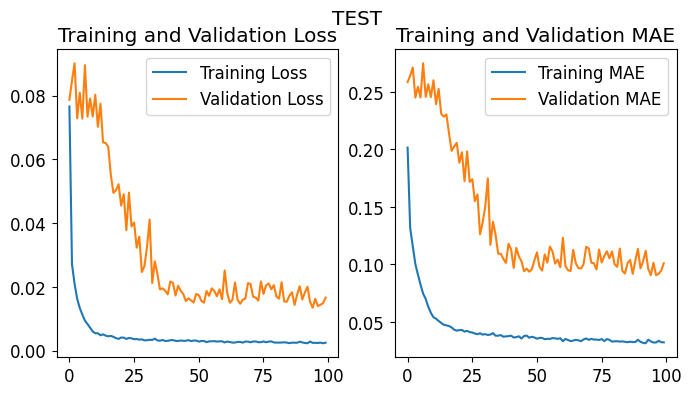

Best val loss: 0.01345109287649393
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


ValueError: 'KD|Dampfmenge' is not in list

In [91]:
validation_metrics_plot(history,"TEST")
#evaluate_and_predict(model, X_test, y_test, '2|CB')
evaluate_and_predict(model, X_test, y_test, 'KD|Dampfmenge')

In [51]:
# ADDED ACTIVATION RELU

def train_lstm_model(X_train, y_train, X_val, y_val, 
                     lstm_units=[32], #list of number of LSTMs
                     recurrent_dropout=0.25, 
                     dropout=0.5, 
                     learning_rate=0.001, 
                     batch_size=32, 
                     epochs=100, 
                     optimizer_type='adam'):
    
    # Model architecture
    inputs = keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
    x = inputs

    # Add LSTM and Dropout layers for each value in lstm_units
    if len(lstm_units) > 1:
        for units in lstm_units[:-1]:
            x = layers.LSTM(units, recurrent_dropout=recurrent_dropout, return_sequences=True, activation="relu")(x)
            #x = layers.LSTM(units, recurrent_dropout=recurrent_dropout, return_sequences=True)(x)
            x = layers.Dropout(dropout)(x)
    
    # Remove return_sequences for the last LSTM layer
    #x = layers.LSTM(lstm_units[-1], recurrent_dropout=recurrent_dropout)(x)
    x = layers.LSTM(lstm_units[-1], recurrent_dropout=recurrent_dropout, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # Callbacks
    callbacks = [
        ModelCheckpoint(
            filepath='chemicals_lstm_test.keras',
            monitor='val_loss',
            save_best_only=True
        ),
        #EarlyStopping(
        #    monitor='val_loss',
        #    patience=20,
        #    restore_best_weights=True
        #),
        #ReduceLROnPlateau(
        #    monitor='val_loss',
        #    factor=0.5,
        #    patience=10,
        #    min_lr=0.00001
        #)
    ]
    
    # Compile the model
    if optimizer_type.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer_type.lower() == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'adadelta':
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'adamax':
        optimizer = Adamax(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be either 'adam' or 'rmsprop'")
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    print (model.summary())
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=callbacks
    )


    min_val_loss = min(history.history["val_loss"])
    
    return model, history, min_val_loss

def train_bidirectional_lstm_with_attention_layer(X_train, y_train, X_val, y_val, 
                     batch_size=32, 
                     epochs=100):

    class AttentionLayer(tf.keras.layers.Layer):
        def __init__(self, **kwargs):
            super(AttentionLayer, self).__init__(**kwargs)
        
        def build(self, input_shape):
            self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                    initializer="random_normal",
                                    trainable=True)
            self.b = self.add_weight(shape=(input_shape[-1],),
                                    initializer="zeros",
                                    trainable=True)
            self.u = self.add_weight(shape=(input_shape[-1], 1),
                                    initializer="random_normal",
                                    trainable=True)
            super(AttentionLayer, self).build(input_shape)
        
        def call(self, inputs):
            score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
            attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
            context_vector = attention_weights * inputs
            context_vector = tf.reduce_sum(context_vector, axis=1)
            return context_vector
        
    def build_model(input_shape):
        model = Sequential()
        
        # First LSTM layer (bidirectional)
        model.add(Bidirectional(LSTM(units=32, return_sequences=True, recurrent_dropout=0.3, dropout=0.5), input_shape=input_shape)) # modified from 64 to 32 units and added recurrent dropout and dropout
        model.add(Dropout(0.5)) #modifued from 0.2 to 0.5
        
        # Second LSTM layer (stacked) not need it?
        #model.add(LSTM(units=32, return_sequences=True, dropout=0.5, recurrent_dropout=0.3)) # modified from 64 to 32 units and added recu_drop and droput
        #model.add(Dropout(0.5))#modifued from 0.2 to 0.5
        
        # Attention layer
        model.add(AttentionLayer())
        
        # Fully connected output layer
        #model.add(Dense(units=1))  # Assuming a single output for regression
        model.add(Dense(units=1, kernel_regularizer=tf.keras.regularizers.l2(0.001))) # added L2 to penalize large weights (regularization)
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

        
        return model
    
    # Build and compile the model
    model = build_model((X_train.shape[1], X_train.shape[2]))
    
    # Callbacks
    callbacks = [
        ModelCheckpoint(
            filepath='chemicals_bi_lstm_attention_test.keras',
            monitor='val_loss',
            save_best_only=True
        ),
    ]
        
    print (model.summary())
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=callbacks
    )


    min_val_loss = min(history.history["val_loss"])
    
    return model, history, min_val_loss
    



### Hyper parameter tunning

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 64)          │        53,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 5, 32)          │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,073 (269.82 KB)

 Trainable params: 69,073 (269.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1193 - mae: 0.2889 - val_loss: 0.1552 - val_mae: 0.3697
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0374 - mae: 0.1570 - val_loss: 0.1582 - val_mae: 0.3689
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mae: 0.1294 - val_loss: 0.1390 - val_mae: 0.3465
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mae: 0.1099 - val_loss: 0.1247 - val_mae: 0.3284
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mae: 0.0982 - val_loss: 0.1234 - val_mae: 0.3241
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mae: 0.0873 - val_loss: 0.1066 - val_mae: 0.2990
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - mae: 0.0787 - val_loss: 0.1099 - val_mae: 0.3050
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mae: 0.0726 - val_loss: 0.0812 - val_mae: 0.2608
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 5, 32)          │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,809 (100.82 KB)

 Trainable params: 25,809 (100.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2331 - mae: 0.3894 - val_loss: 0.1614 - val_mae: 0.3738
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0527 - mae: 0.1893 - val_loss: 0.1240 - val_mae: 0.3287
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 - mae: 0.1574 - val_loss: 0.1205 - val_mae: 0.3260
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mae: 0.1345 - val_loss: 0.0977 - val_mae: 0.2913
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mae: 0.1122 - val_loss: 0.1177 - val_mae: 0.3196
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mae: 0.1019 - val_loss: 0.1124 - val_mae: 0.3104
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mae: 0.0908 - val_loss: 0.1030 - val_mae: 0.2962
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mae: 0.0786 - val_loss: 0.0986 - val_mae: 0.2893
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1257 - mae: 0.2745 - val_loss: 0.1474 - val_mae: 0.3494
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339 - mae: 0.1472 - val_loss: 0.1066 - val_mae: 0.2987
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247 - mae: 0.1263 - val_loss: 0.0694 - val_mae: 0.2421
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - mae: 0.1082 - val_loss: 0.0860 - val_mae: 0.2679
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139 - mae: 0.0930 - val_loss: 0.0717 - val_mae: 0.2419
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - mae: 0.0828 - val_loss: 0.0635 - val_mae: 0.2211
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0735 - val_loss: 0.0605 - val_mae: 0.2166
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - mae: 0.0671 - val_loss: 0.0649 - val_mae: 0.2309
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 16)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,321 (40.32 KB)

 Trainable params: 10,321 (40.32 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0994 - mae: 0.2430 - val_loss: 0.1280 - val_mae: 0.3335
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - mae: 0.1555 - val_loss: 0.1193 - val_mae: 0.3285
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0250 - mae: 0.1264 - val_loss: 0.0949 - val_mae: 0.2926
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - mae: 0.1019 - val_loss: 0.0956 - val_mae: 0.2947
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - mae: 0.0902 - val_loss: 0.0825 - val_mae: 0.2725
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - mae: 0.0799 - val_loss: 0.0760 - val_mae: 0.2596
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - mae: 0.0695 - val_loss: 0.0784 - val_mae: 0.2631
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - mae: 0.0643 - val_loss: 0.0699 - val_mae: 0.2449
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

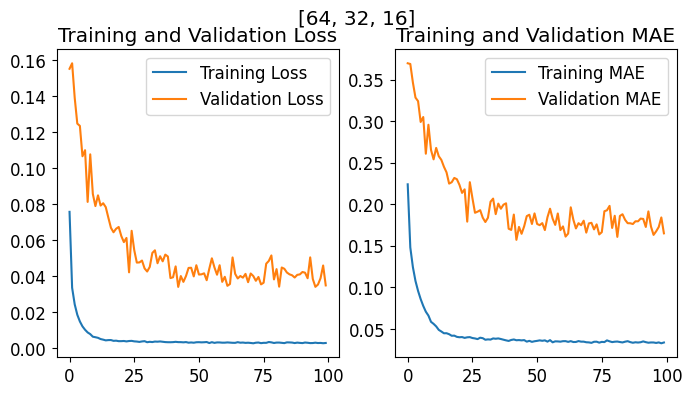

Best val loss: 0.033934544771909714


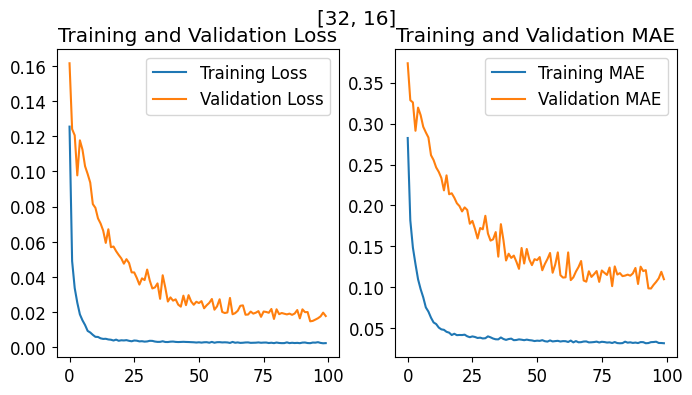

Best val loss: 0.014834309928119183


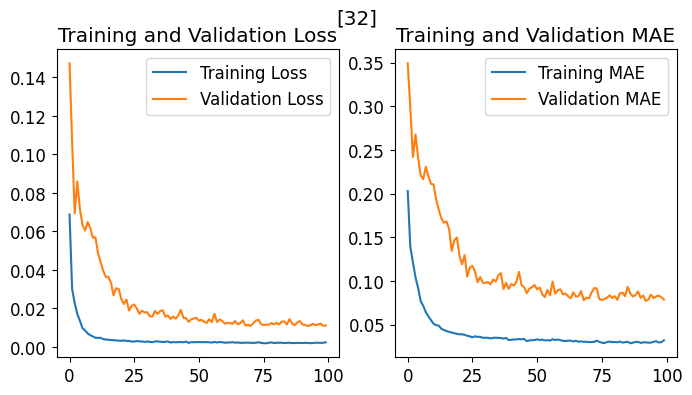

Best val loss: 0.010914689861238003


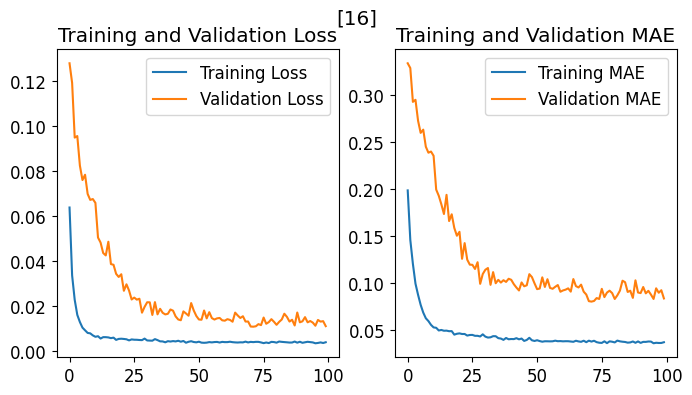

Best val loss: 0.010782675817608833


In [35]:
# check the units and layers first

histories = []
lstm_units = [[64,32,16],[32,16],[32],[16]]
for lstm_unit in lstm_units:
    model, history, min_val_loss = train_lstm_model(X_train, y_train, X_val, y_val, lstm_units=lstm_unit)
    histories.append(history)

for value, history in zip(lstm_units, histories):
    validation_metrics_plot(history,value)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3186 - mae: 0.4001 - val_loss: 0.2197 - val_mae: 0.4367
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246 - mae: 0.1255 - val_loss: 0.1732 - val_mae: 0.3918
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - mae: 0.0983 - val_loss: 0.1550 - val_mae: 0.3715
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - mae: 0.0888 - val_loss: 0.1456 - val_mae: 0.3602
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133 - mae: 0.0824 - val_loss: 0.1385 - val_mae: 0.3509
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 - mae: 0.0812 - val_loss: 0.1335 - val_mae: 0.3440
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0118 - mae: 0.0759 - val_loss: 0.1301 - val_mae: 0.3393
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - mae: 0.0729 - val_loss: 0.1291 - val_mae: 0.3383
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4492 - mae: 0.5417 - val_loss: 0.2260 - val_mae: 0.4124
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0953 - mae: 0.2523 - val_loss: 0.1790 - val_mae: 0.3619
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0807 - mae: 0.2270 - val_loss: 0.1646 - val_mae: 0.3470
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0694 - mae: 0.2120 - val_loss: 0.1599 - val_mae: 0.3434
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0647 - mae: 0.2038 - val_loss: 0.1549 - val_mae: 0.3390
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0623 - mae: 0.2007 - val_loss: 0.1471 - val_mae: 0.3297
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0572 - mae: 0.1918 - val_loss: 0.1474 - val_mae: 0.3310
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0574 - mae: 0.1897 - val_loss: 0.1421 - val_mae: 0.3238
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2629 - mae: 0.4157 - val_loss: 0.0609 - val_mae: 0.2055
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2386 - mae: 0.3937 - val_loss: 0.0654 - val_mae: 0.2165
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2150 - mae: 0.3782 - val_loss: 0.0702 - val_mae: 0.2273
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2044 - mae: 0.3706 - val_loss: 0.0750 - val_mae: 0.2372
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2084 - mae: 0.3718 - val_loss: 0.0795 - val_mae: 0.2461
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1868 - mae: 0.3542 - val_loss: 0.0840 - val_mae: 0.2545
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1791 - mae: 0.3432 - val_loss: 0.0880 - val_mae: 0.2620
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1734 - mae: 0.3406 - val_loss: 0.0922 - val_mae: 0.2702
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1964 - mae: 0.2991 - val_loss: 0.0869 - val_mae: 0.2702
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0257 - mae: 0.1281 - val_loss: 0.0555 - val_mae: 0.2113
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - mae: 0.1092 - val_loss: 0.0470 - val_mae: 0.1891
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - mae: 0.0911 - val_loss: 0.0537 - val_mae: 0.2071
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 - mae: 0.0788 - val_loss: 0.0523 - val_mae: 0.2048
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - mae: 0.0714 - val_loss: 0.0681 - val_mae: 0.2405
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - mae: 0.0626 - val_loss: 0.0591 - val_mae: 0.2216
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - mae: 0.0548 - val_loss: 0.0430 - val_mae: 0.1768
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1516 - mae: 0.2848 - val_loss: 0.1211 - val_mae: 0.3225
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0292 - mae: 0.1377 - val_loss: 0.1117 - val_mae: 0.3078
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256 - mae: 0.1273 - val_loss: 0.0711 - val_mae: 0.2406
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 - mae: 0.1103 - val_loss: 0.0817 - val_mae: 0.2613
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mae: 0.0965 - val_loss: 0.0991 - val_mae: 0.2917
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - mae: 0.0884 - val_loss: 0.0711 - val_mae: 0.2437
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - mae: 0.0802 - val_loss: 0.0592 - val_mae: 0.2204
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mae: 0.0701 - val_loss: 0.0665 - val_mae: 0.2368
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

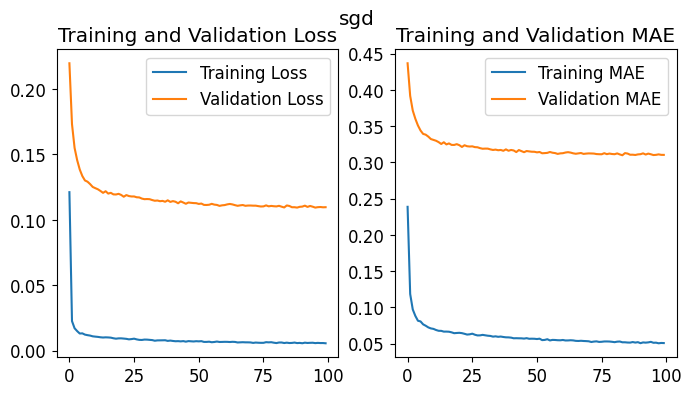

Best val loss: 0.10935866832733154


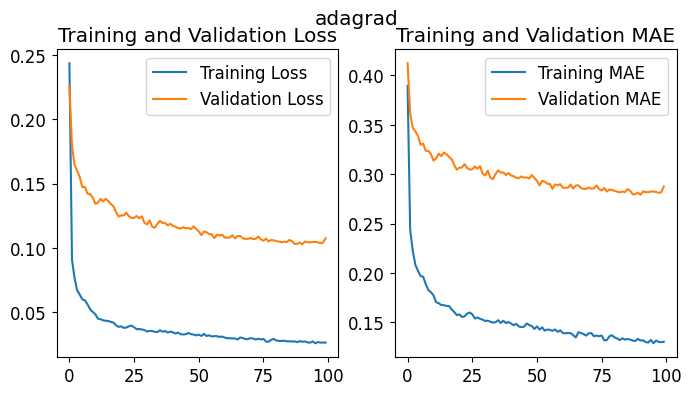

Best val loss: 0.10276956111192703


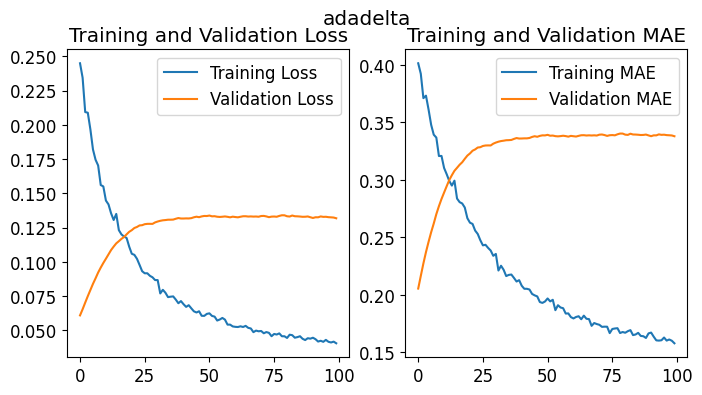

Best val loss: 0.06093032658100128


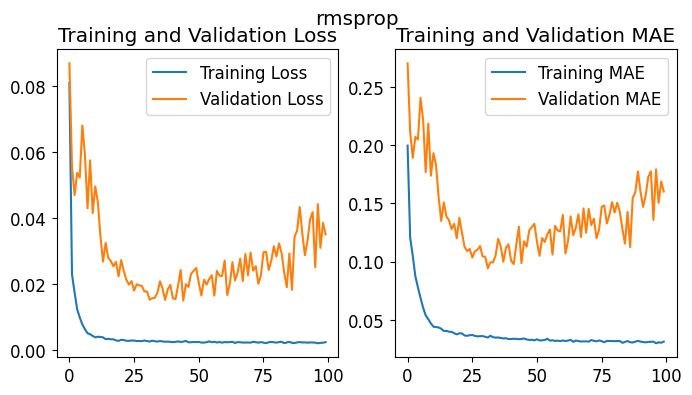

Best val loss: 0.014993267133831978


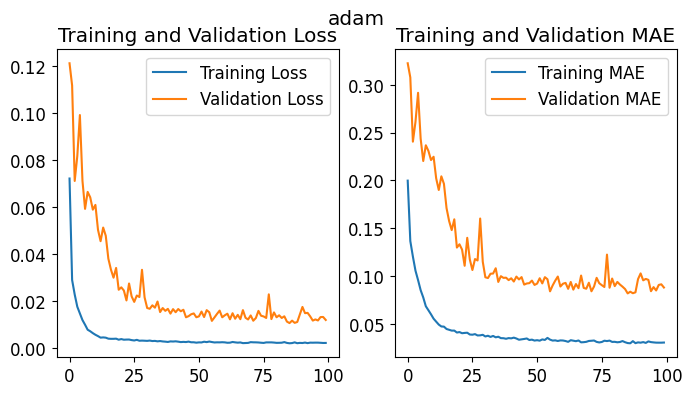

Best val loss: 0.010678811930119991


In [40]:
# best aarchitecture single lstm layer with 32 units

lstm_units = [32]
histories = []

values = ["sgd", "adagrad", "adadelta","rmsprop", "adam"]
for optimizer in values:
    model, history, min_val_loss = train_lstm_model(X_train, y_train, X_val, y_val, lstm_units=lstm_units, optimizer_type=optimizer)
    histories.append(history)

for value, history in zip(values, histories):
    validation_metrics_plot(history,value)

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4887.8760 - mae: 16.7926 - val_loss: 0.7102 - val_mae: 0.7878
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3063 - mae: 0.5375 - val_loss: 0.3834 - val_mae: 0.5714
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1093 - mae: 0.3185 - val_loss: 0.2206 - val_mae: 0.4454
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0369 - mae: 0.1757 - val_loss: 0.1576 - val_mae: 0.3777
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 - mae: 0.1058 - val_loss: 0.1357 - val_mae: 0.3470
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - mae: 0.0820 - val_loss: 0.1286 - val_mae: 0.3355
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mae: 0.0754 - val_loss: 0.1260 - val_mae: 0.3312
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - mae: 0.0746 - val_loss: 0.1257 - val_mae: 0.3306
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9590 - mae: 0.4650 - val_loss: 0.1873 - val_mae: 0.4071
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0312 - mae: 0.1434 - val_loss: 0.1285 - val_mae: 0.3386
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0175 - mae: 0.0937 - val_loss: 0.1199 - val_mae: 0.3231
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - mae: 0.0840 - val_loss: 0.1110 - val_mae: 0.3095
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.0745 - val_loss: 0.1083 - val_mae: 0.3034
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143 - mae: 0.0726 - val_loss: 0.1140 - val_mae: 0.3141
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - mae: 0.0700 - val_loss: 0.1217 - val_mae: 0.3278
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 - mae: 0.0704 - val_loss: 0.1135 - val_mae: 0.3149
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2180 - mae: 0.3205 - val_loss: 0.0644 - val_mae: 0.2268
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 - mae: 0.1314 - val_loss: 0.0776 - val_mae: 0.2559
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - mae: 0.1187 - val_loss: 0.0520 - val_mae: 0.2030
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191 - mae: 0.1107 - val_loss: 0.0558 - val_mae: 0.2127
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152 - mae: 0.0974 - val_loss: 0.0647 - val_mae: 0.2295
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - mae: 0.0884 - val_loss: 0.0563 - val_mae: 0.2149
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - mae: 0.0785 - val_loss: 0.0524 - val_mae: 0.2064
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 - mae: 0.0743 - val_loss: 0.0565 - val_mae: 0.2154
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0810 - mae: 0.2112 - val_loss: 0.0965 - val_mae: 0.2795
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 - mae: 0.1363 - val_loss: 0.0915 - val_mae: 0.2756
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - mae: 0.1156 - val_loss: 0.0962 - val_mae: 0.2880
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - mae: 0.1048 - val_loss: 0.0864 - val_mae: 0.2719
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139 - mae: 0.0937 - val_loss: 0.0811 - val_mae: 0.2614
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - mae: 0.0900 - val_loss: 0.0718 - val_mae: 0.2435
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - mae: 0.0852 - val_loss: 0.0757 - val_mae: 0.2533
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - mae: 0.0807 - val_loss: 0.0666 - val_mae: 0.2335
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3354 - mae: 0.4547 - val_loss: 0.3058 - val_mae: 0.5055
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 - mae: 0.2314 - val_loss: 0.2102 - val_mae: 0.4142
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514 - mae: 0.1819 - val_loss: 0.1884 - val_mae: 0.3945
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446 - mae: 0.1701 - val_loss: 0.1571 - val_mae: 0.3597
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0413 - mae: 0.1625 - val_loss: 0.1605 - val_mae: 0.3661
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0343 - mae: 0.1490 - val_loss: 0.1436 - val_mae: 0.3455
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0325 - mae: 0.1432 - val_loss: 0.1431 - val_mae: 0.3464
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 - mae: 0.1421 - val_loss: 0.1363 - val_mae: 0.3375
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

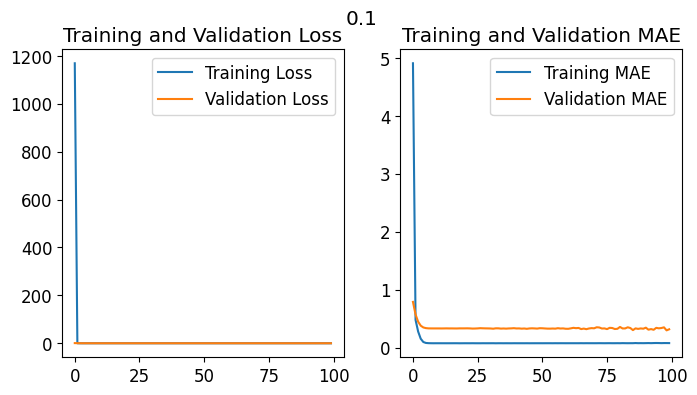

Best val loss: 0.10843629390001297


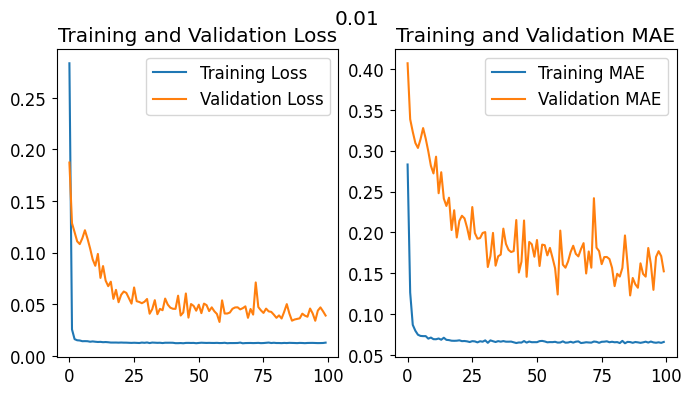

Best val loss: 0.03289579972624779


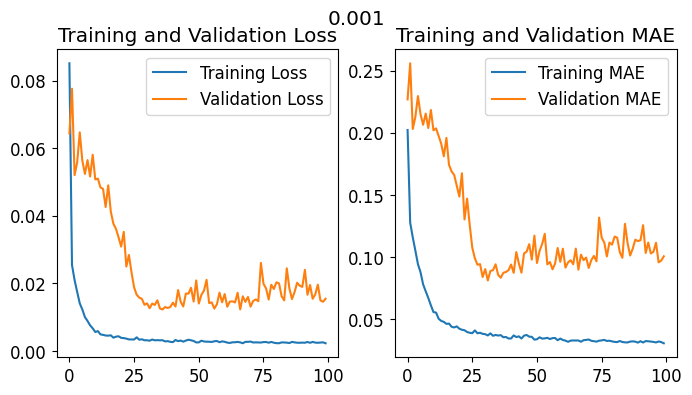

Best val loss: 0.01228018943220377


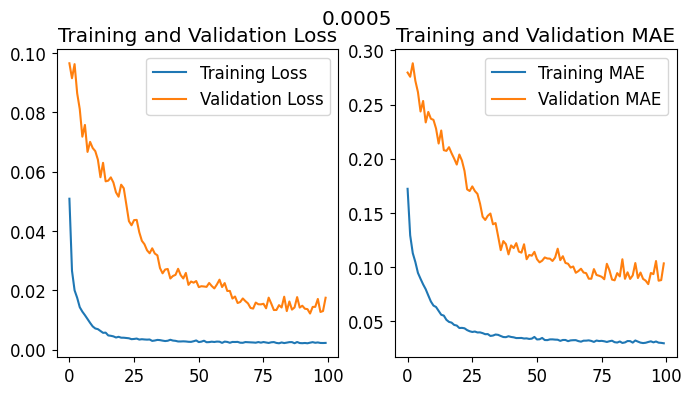

Best val loss: 0.012132585979998112


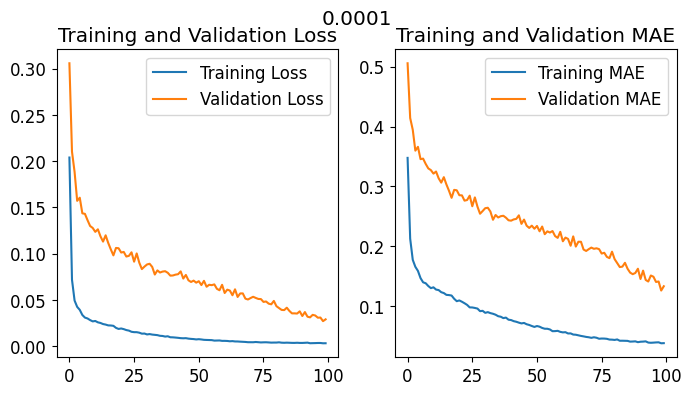

Best val loss: 0.02709091454744339
learnig rate: 0.100000 -> 0.108436
learnig rate: 0.010000 -> 0.032896
learnig rate: 0.001000 -> 0.012280
learnig rate: 0.000500 -> 0.012133
learnig rate: 0.000100 -> 0.027091


In [42]:
# Adam does a fine job

lstm_units = [32]
optimizer = "adam"

histories = []
loss_mins = []
lrs = [0.1, 0.01, 0.001, 0.0005, 0.0001]
for lr in lrs:
    model, history, min_val_loss = train_lstm_model(X_train, y_train, X_val, y_val,learning_rate=lr, lstm_units=lstm_units, optimizer_type=optimizer)
    histories.append(history)
    loss_mins.append(min_val_loss)

for value, history in zip (lrs, histories):
    validation_metrics_plot(history,value)
for lr, loss_min in zip(lrs,loss_mins):
    print ("learnig rate: %f -> %f" % (lr, loss_min))

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0968 - mae: 0.2237 - val_loss: 0.0910 - val_mae: 0.2774
Epoch 2/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0207 - mae: 0.1139 - val_loss: 0.0806 - val_mae: 0.2619
Epoch 3/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0143 - mae: 0.0935 - val_loss: 0.0677 - val_mae: 0.2381
Epoch 4/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0105 - mae: 0.0793 - val_loss: 0.0778 - val_mae: 0.2612
Epoch 5/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - mae: 0.0717 - val_loss: 0.0612 - val_mae: 0.2224
Epoch 6/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - mae: 0.0610 - val_loss: 0.0614 - val_mae: 0.2285
Epoch 7/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - mae: 0.0591 - val_loss: 0.0473 - val_mae: 0.1895
Epoch 8/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0061 - mae: 0.0553 - val_loss: 0.0512 - val_mae: 0.1973
Epoch 9/100
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0903 - mae: 0.2248 - val_loss: 0.1165 - val_mae: 0.3187
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - mae: 0.1346 - val_loss: 0.1003 - val_mae: 0.2939
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - mae: 0.1115 - val_loss: 0.1128 - val_mae: 0.3116
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mae: 0.0973 - val_loss: 0.0851 - val_mae: 0.2694
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0139 - mae: 0.0931 - val_loss: 0.0876 - val_mae: 0.2761
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - mae: 0.0817 - val_loss: 0.0815 - val_mae: 0.2663
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - mae: 0.0739 - val_loss: 0.0821 - val_mae: 0.2673
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0656 - val_loss: 0.0698 - val_mae: 0.2454
Epoch 9/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4835 - mae: 0.4706 - val_loss: 0.1725 - val_mae: 0.3816
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0449 - mae: 0.1721 - val_loss: 0.1574 - val_mae: 0.3650
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342 - mae: 0.1480 - val_loss: 0.1380 - val_mae: 0.3414
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252 - mae: 0.1269 - val_loss: 0.1194 - val_mae: 0.3163
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - mae: 0.1165 - val_loss: 0.1189 - val_mae: 0.3158
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - mae: 0.1159 - val_loss: 0.1125 - val_mae: 0.3072
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - mae: 0.1059 - val_loss: 0.0926 - val_mae: 0.2796
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 - mae: 0.1003 - val_loss: 0.0847 - val_mae: 0.2682
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1436 - mae: 0.2880 - val_loss: 0.0914 - val_mae: 0.2835
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0339 - mae: 0.1468 - val_loss: 0.0826 - val_mae: 0.2695
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - mae: 0.1316 - val_loss: 0.0788 - val_mae: 0.2622
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 - mae: 0.1204 - val_loss: 0.0745 - val_mae: 0.2542
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222 - mae: 0.1185 - val_loss: 0.0739 - val_mae: 0.2540
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - mae: 0.1113 - val_loss: 0.0709 - val_mae: 0.2480
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 - mae: 0.1090 - val_loss: 0.0606 - val_mae: 0.2260
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 - mae: 0.1038 - val_loss: 0.0529 - val_mae: 0.2070
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

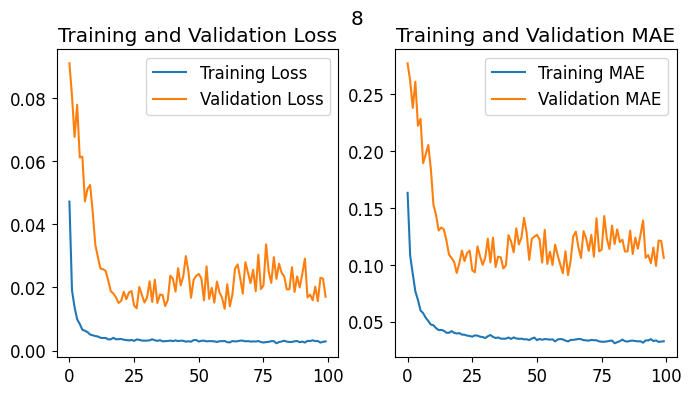

Best val loss: 0.013243187218904495
Batch size: 16.000000


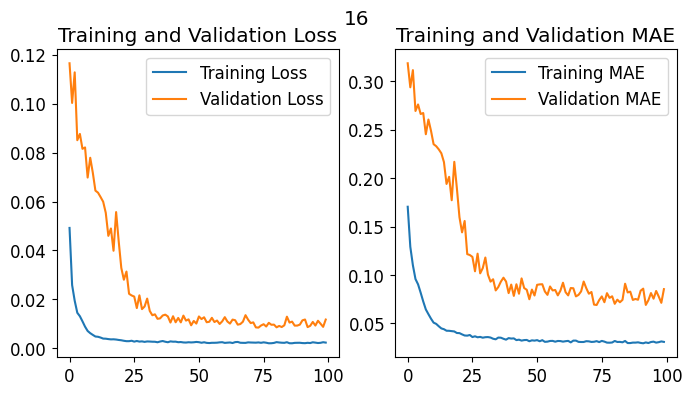

Best val loss: 0.008455819450318813
Batch size: 32.000000


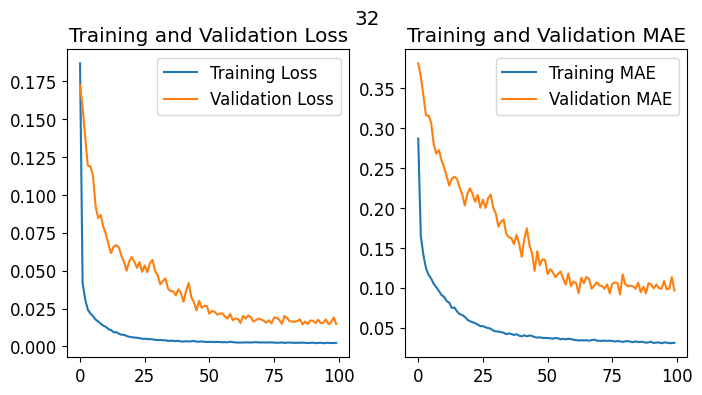

Best val loss: 0.014536700211465359
Batch size: 64.000000


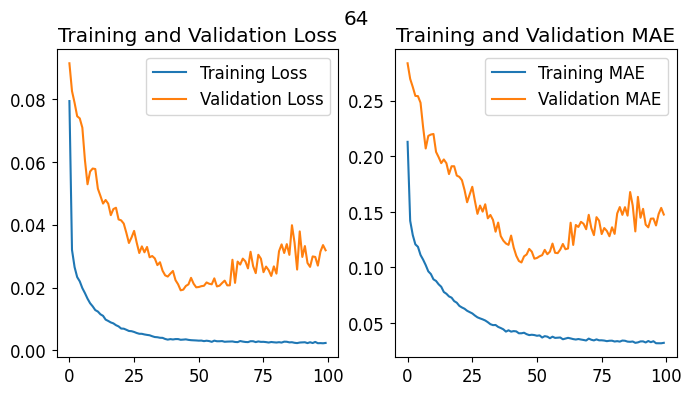

Best val loss: 0.01913541927933693
Batch size: 8.000000 -> 0.108436
Batch size: 16.000000 -> 0.032896
Batch size: 32.000000 -> 0.012280
Batch size: 64.000000 -> 0.012133


In [43]:

# 0.001 looks good. (Actually it is the default)
# 0.0005 looks good for global predictions. (Actually it is the default)
# let's try with different batch sizes.

lstm_units = [32]
optimizer = "adam"
learning_rate = 0.0005

histories = []
loss_minmins = []
batch_sizes = [8,16,32,64]
for bs in batch_sizes:
    model, history, min_val_loss = train_lstm_model(X_train, y_train, X_val, y_val, batch_size=bs, learning_rate=learning_rate, lstm_units=lstm_units, optimizer_type=optimizer)
    histories.append(history)
    loss_mins.append(min_val_loss)



for history, bs in zip(histories, batch_sizes):
    print ("Batch size: %f" % (bs))
    validation_metrics_plot(history,bs)
for bs, loss_min in zip(batch_sizes,loss_mins):
    print ("Batch size: %f -> %f" % (bs, loss_min))

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3017 - mae: 0.3820 - val_loss: 0.1640 - val_mae: 0.3775
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0331 - mae: 0.1458 - val_loss: 0.1166 - val_mae: 0.3190
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267 - mae: 0.1291 - val_loss: 0.1021 - val_mae: 0.2979
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 - mae: 0.1155 - val_loss: 0.0946 - val_mae: 0.2880
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0180 - mae: 0.1071 - val_loss: 0.1094 - val_mae: 0.3070
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - mae: 0.0973 - val_loss: 0.0869 - val_mae: 0.2730
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - mae: 0.0885 - val_loss: 0.1017 - val_mae: 0.2955
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103 - mae: 0.0801 - val_loss: 0.0843 - val_mae: 0.2693
Epoch 9/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0674 - mae: 0.1980 - val_loss: 0.1226 - val_mae: 0.3149
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 - mae: 0.1201 - val_loss: 0.0902 - val_mae: 0.2736
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - mae: 0.1074 - val_loss: 0.0781 - val_mae: 0.2567
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - mae: 0.0928 - val_loss: 0.0566 - val_mae: 0.2137
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 - mae: 0.0844 - val_loss: 0.0694 - val_mae: 0.2420
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0745 - val_loss: 0.0633 - val_mae: 0.2300
Epoch 7/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - mae: 0.0672 - val_loss: 0.0764 - val_mae: 0.2568
Epoch 8/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - mae: 0.0601 - val_loss: 0.0632 - val_mae: 0.2309
Epoch 9/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1125 - mae: 0.2403 - val_loss: 0.0867 - val_mae: 0.2714
Epoch 2/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 - mae: 0.1283 - val_loss: 0.0840 - val_mae: 0.2692
Epoch 3/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - mae: 0.1122 - val_loss: 0.0672 - val_mae: 0.2373
Epoch 4/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0177 - mae: 0.1060 - val_loss: 0.0648 - val_mae: 0.2337
Epoch 5/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - mae: 0.0908 - val_loss: 0.0678 - val_mae: 0.2402
Epoch 6/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111 - mae: 0.0819 - val_loss: 0.0547 - val_mae: 0.2124
Epoch 7/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - mae: 0.0765 - val_loss: 0.0569 - val_mae: 0.2180
Epoch 8/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mae: 0.0688 - val_loss: 0.0524 - val_mae: 0.2081
Epoch 9/150
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 32)             │        22,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,689 (88.63 KB)

 Trainable params: 22,689 (88.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1729 - mae: 0.2904 - val_loss: 0.1450 - val_mae: 0.3567
Epoch 2/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0326 - mae: 0.1454 - val_loss: 0.1381 - val_mae: 0.3500
Epoch 3/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258 - mae: 0.1272 - val_loss: 0.1186 - val_mae: 0.3248
Epoch 4/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0201 - mae: 0.1126 - val_loss: 0.1102 - val_mae: 0.3131
Epoch 5/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 - mae: 0.1010 - val_loss: 0.1050 - val_mae: 0.3047
Epoch 6/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 - mae: 0.0888 - val_loss: 0.0888 - val_mae: 0.2789
Epoch 7/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - mae: 0.0791 - val_loss: 0.0972 - val_mae: 0.2932
Epoch 8/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - mae: 0.0713 - val_loss: 0.0849 - val_mae: 0.2722
Epoch 9/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s

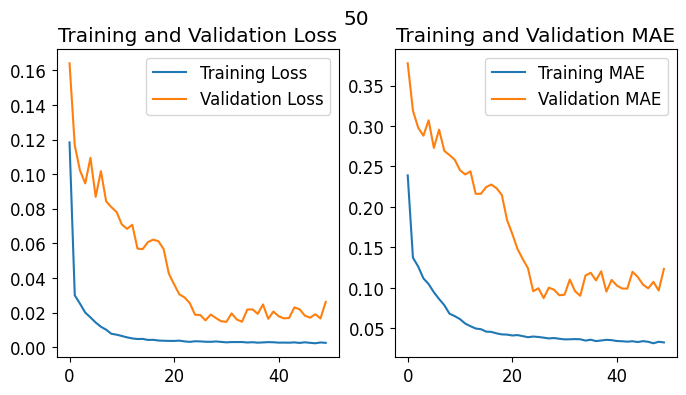

Best val loss: 0.01463044248521328
Epochs: 100.000000


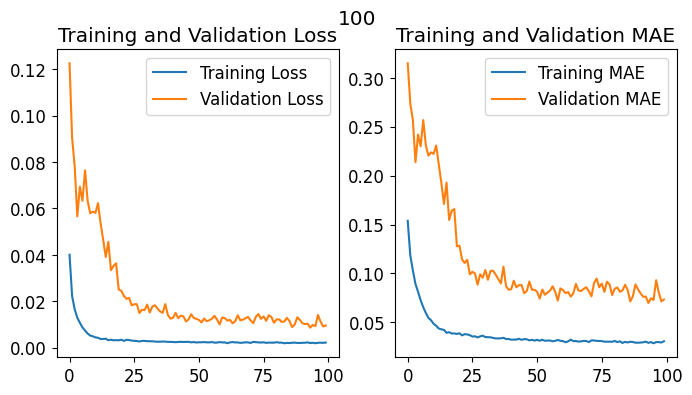

Best val loss: 0.008601268753409386
Epochs: 150.000000


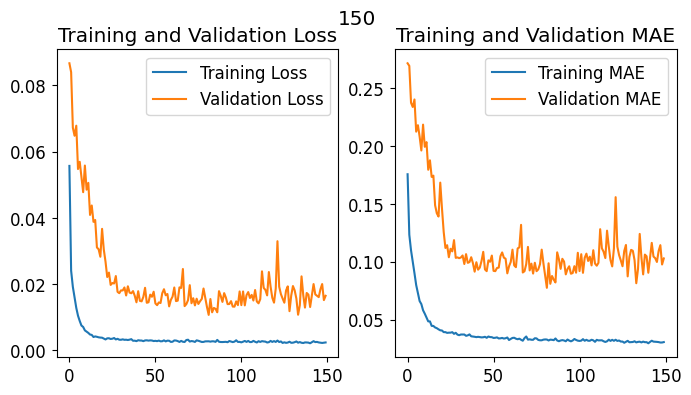

Best val loss: 0.01074641291052103
Epochs: 200.000000


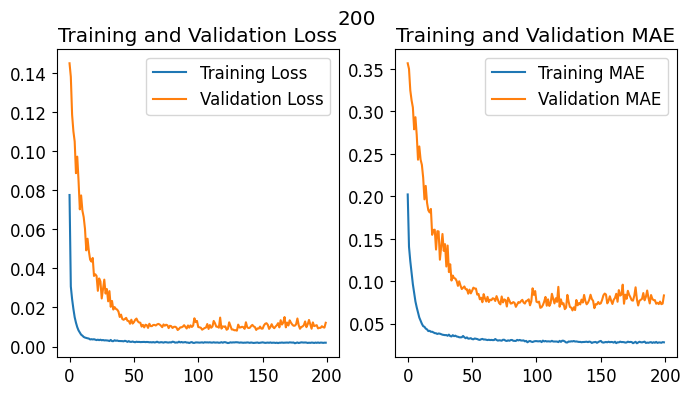

Best val loss: 0.0081279706209898
Epochs: 50.000000 -> 0.014630
Epochs: 100.000000 -> 0.008601
Epochs: 150.000000 -> 0.010746
Epochs: 200.000000 -> 0.008128


In [45]:
# Batch size 32 of works well.
# Batch size 16 for global predictions works well.
# let's try at last epochs.

lstm_units = [32]
optimizer = "adam"
learning_rate = 0.0005
batch_size = 16

histories = []
loss_mins = []
epoch_list = [50,100,150,200]
for ep in epoch_list:
    model, history, min_val_loss = train_lstm_model(X_train, y_train, X_val, y_val, epochs=ep, batch_size=batch_size, learning_rate=learning_rate, lstm_units=lstm_units, optimizer_type=optimizer)
    histories.append(history)
    loss_mins.append(min_val_loss)


for history, ep in zip(histories, epoch_list):
    print ("Epochs: %f" % (ep))
    validation_metrics_plot(history, ep)
for ep, loss_min in zip(epoch_list,loss_mins):
    print ("Epochs: %f -> %f" % (ep, loss_min))

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_9 (Bidirectional) │ (None, 5, 64)          │        45,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_8               │ (None, 64)             │         4,224 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,601 (193.75 KB)

 Trainable params: 49,601 (193.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0598 - mae: 0.1794 - val_loss: 0.0703 - val_mae: 0.2322
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mae: 0.0924 - val_loss: 0.0593 - val_mae: 0.2088
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 - mae: 0.0786 - val_loss: 0.0626 - val_mae: 0.2131
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - mae: 0.0730 - val_loss: 0.0663 - val_mae: 0.2204
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0100 - mae: 0.0702 - val_loss: 0.0722 - val_mae: 0.2321
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - mae: 0.0672 - val_loss: 0.0663 - val_mae: 0.2207
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - mae: 0.0654 - val_loss: 0.0702 - val_mae: 0.2276
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - mae: 0.0634 - val_loss: 0.0710 - val_mae: 0.2284
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s

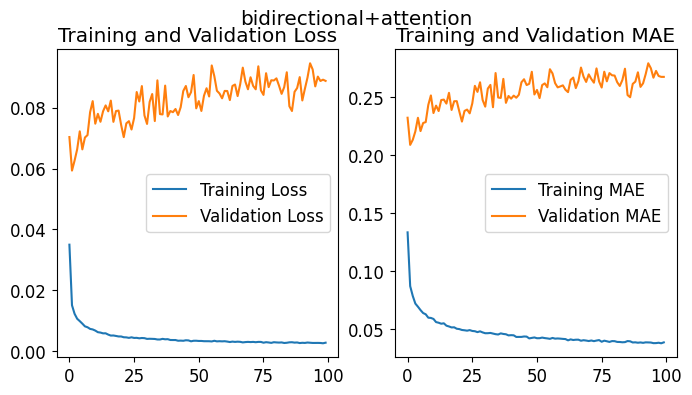

Best val loss: 0.05933055654168129


In [52]:
# I will try bidirectional lstm with attention layer

batch_size = 32
epochs = 100

model, history, min_val_loss = train_bidirectional_lstm_with_attention_layer(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size)
validation_metrics_plot(history, "bidirectional+attention")

In [ ]:
# 

In [31]:

# 100 epochs is more than enough.
# Let's train final model.

def train_final_lstm_model(X_train_full, y_train_full, 
                           lstm_units=[32], 
                           recurrent_dropout=0.25, 
                           dropout=0.5, 
                           learning_rate=0.001, 
                           batch_size=32, 
                           epochs=100, 
                           optimizer_type='adam'):
    
    # Model architecture
    inputs = keras.Input(shape=(X_train_full.shape[1], X_train_full.shape[2]))
    x = inputs

    # Add LSTM and Dropout layers for each value in lstm_units
    if len(lstm_units) > 1:
        for units in lstm_units[:-1]:
            x = layers.LSTM(units, recurrent_dropout=recurrent_dropout, return_sequences=True)(x)
            x = layers.Dropout(dropout)(x)
    
    # Remove return_sequences for the last LSTM layer
    x = layers.LSTM(lstm_units[-1], recurrent_dropout=recurrent_dropout)(x)
    x = layers.Dropout(dropout)(x)
    
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    if optimizer_type.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be either 'adam' or 'rmsprop'")
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    print(model.summary())
    
    # Train the model without validation data
    history = model.fit(
        X_train_full, y_train_full,
        batch_size=batch_size,
        epochs=epochs
    )
    
    return model, history

# reactor 2
#model, history = train_final_lstm_model(X_train_full, y_train_full, 
#                                                      epochs=100, 
#                                                      batch_size=32, 
#                                                      learning_rate=0.001, 
#                                                      lstm_units=[16], 
#                                                      optimizer_type="adam")


#lstm_units = [32]
lstm_units = [16]
optimizer = "adam"
#learning_rate = 0.0005
learning_rate = 0.001
batch_size = 16
epochs = 200
model, history = train_final_lstm_model(X_train_full, y_train_full, 
                                                      epochs=epochs, 
                                                      batch_size=batch_size, 
                                                      learning_rate=learning_rate, 
                                                      lstm_units=lstm_units, 
                                                      optimizer_type=optimizer)




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 64)          │        53,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,953 (257.63 KB)

 Trainable params: 65,953 (257.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0616 - mae: 0.1905
Epoch 2/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0208 - mae: 0.1120
Epoch 3/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163 - mae: 0.0976
Epoch 4/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132 - mae: 0.0876
Epoch 5/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0106 - mae: 0.0782
Epoch 6/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - mae: 0.0778
Epoch 7/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - mae: 0.0697
Epoch 8/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078 - mae: 0.0642
Epoch 9/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0070 - mae: 0.0600
Epoch 10/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - mae: 0.0558
Epoch 11/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - mae: 0.0548
Epoch 12/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - mae: 0.0497
Epoch 13

KeyboardInterrupt: 

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step
MSE: 28877.300995744754
RMSE: 169.93322510840767
MAE: 108.43989881839053
R2 Score: 0.9367133807343978
MAPE: inf%


/tmp/ipykernel_13721/3837770426.py:26: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100


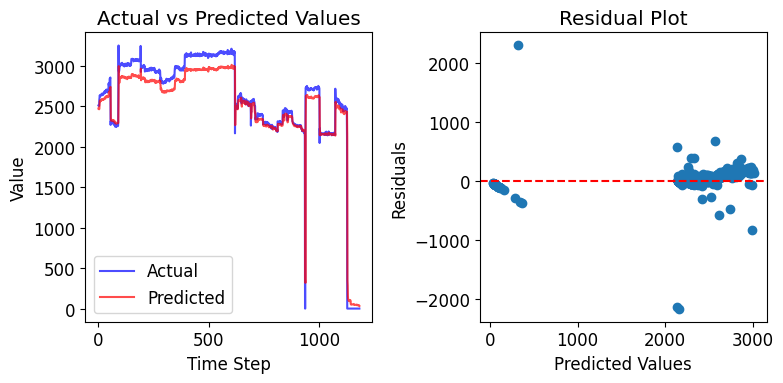

In [83]:
#evaluate_and_predict(model, X_test, y_test, '2|CB') # model for reactor 2


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MSE: 9.075257005625236
RMSE: 3.0125167228789347
MAE: 2.31546586318367
R2 Score: 0.7375309025362851
MAPE: 9.245195768379368%


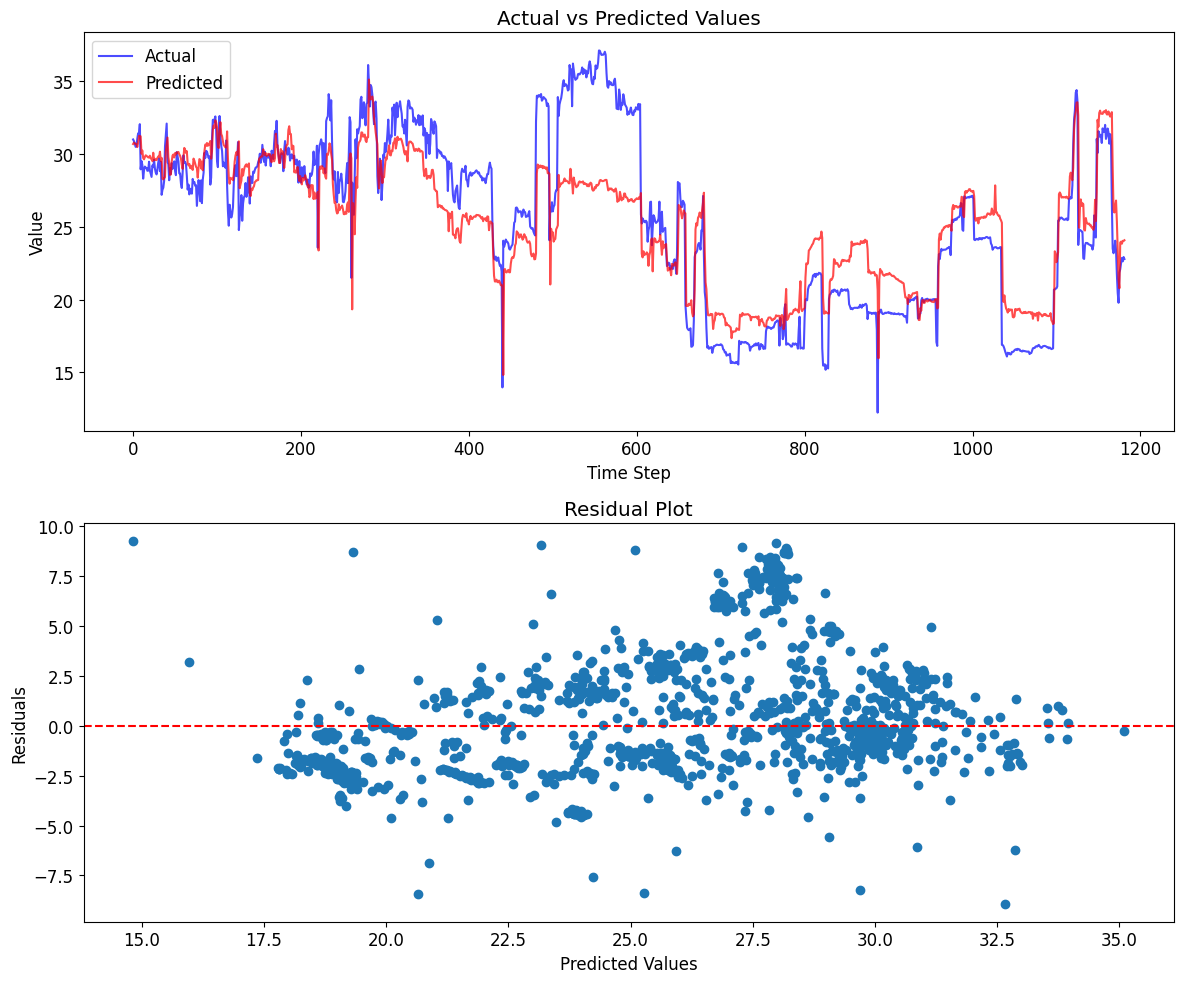

In [47]:
evaluate_and_predict(model, X_test, y_test, 'KD|Dampfmenge') #global variable Steam

In [53]:

# 100 epochs is more than enough.
# Let's train final model.

def train_final_lstm_model_relu(X_train_full, y_train_full, 
                           lstm_units=[32], 
                           recurrent_dropout=0.25, 
                           dropout=0.5, 
                           learning_rate=0.001, 
                           batch_size=32, 
                           epochs=100, 
                           optimizer_type='adam'):
    
    # Model architecture
    inputs = keras.Input(shape=(X_train_full.shape[1], X_train_full.shape[2]))
    x = inputs

    # Add LSTM and Dropout layers for each value in lstm_units
    if len(lstm_units) > 1:
        for units in lstm_units[:-1]:
            x = layers.LSTM(units, recurrent_dropout=recurrent_dropout, return_sequences=True, activation="relu")(x)
            x = layers.Dropout(dropout)(x)
    
    # Remove return_sequences for the last LSTM layer
    x = layers.LSTM(lstm_units[-1], recurrent_dropout=recurrent_dropout)(x)
    x = layers.Dropout(dropout)(x)
    
    outputs = layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    # Compile the model
    if optimizer_type.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_type.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Optimizer must be either 'adam' or 'rmsprop'")
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    print(model.summary())
    
    # Train the model without validation data
    history = model.fit(
        X_train_full, y_train_full,
        batch_size=batch_size,
        epochs=epochs
    )
    
    return model, history


#lstm_units = [32]
lstm_units = [16]
optimizer = "adam"
#learning_rate = 0.0005
learning_rate = 0.001
batch_size = 16
epochs = 200

model, history = train_final_lstm_model_relu(X_train_full, y_train_full, 
                                                      epochs=epochs, 
                                                      batch_size=batch_size, 
                                                      learning_rate=learning_rate, 
                                                      lstm_units=lstm_units, 
                                                      optimizer_type=optimizer)




Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 5, 144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 16)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,321 (40.32 KB)

 Trainable params: 10,321 (40.32 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1559 - mae: 0.2728
Epoch 2/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 - mae: 0.1329
Epoch 3/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 - mae: 0.1069
Epoch 4/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0147 - mae: 0.0914
Epoch 5/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0111 - mae: 0.0772
Epoch 6/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084 - mae: 0.0668
Epoch 7/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - mae: 0.0642
Epoch 8/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mae: 0.0576
Epoch 9/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070 - mae: 0.0561
Epoch 10/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062 - mae: 0.0520
Epoch 11/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - mae: 0.0503
Epoch 12/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - mae: 0.0509
Epoch 13

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
MSE: 20581.251013147874
RMSE: 143.4616708851109
MAE: 70.50157350971824
R2 Score: 0.9548947529039915
MAPE: inf%


/tmp/ipykernel_13721/1963952249.py:26: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100


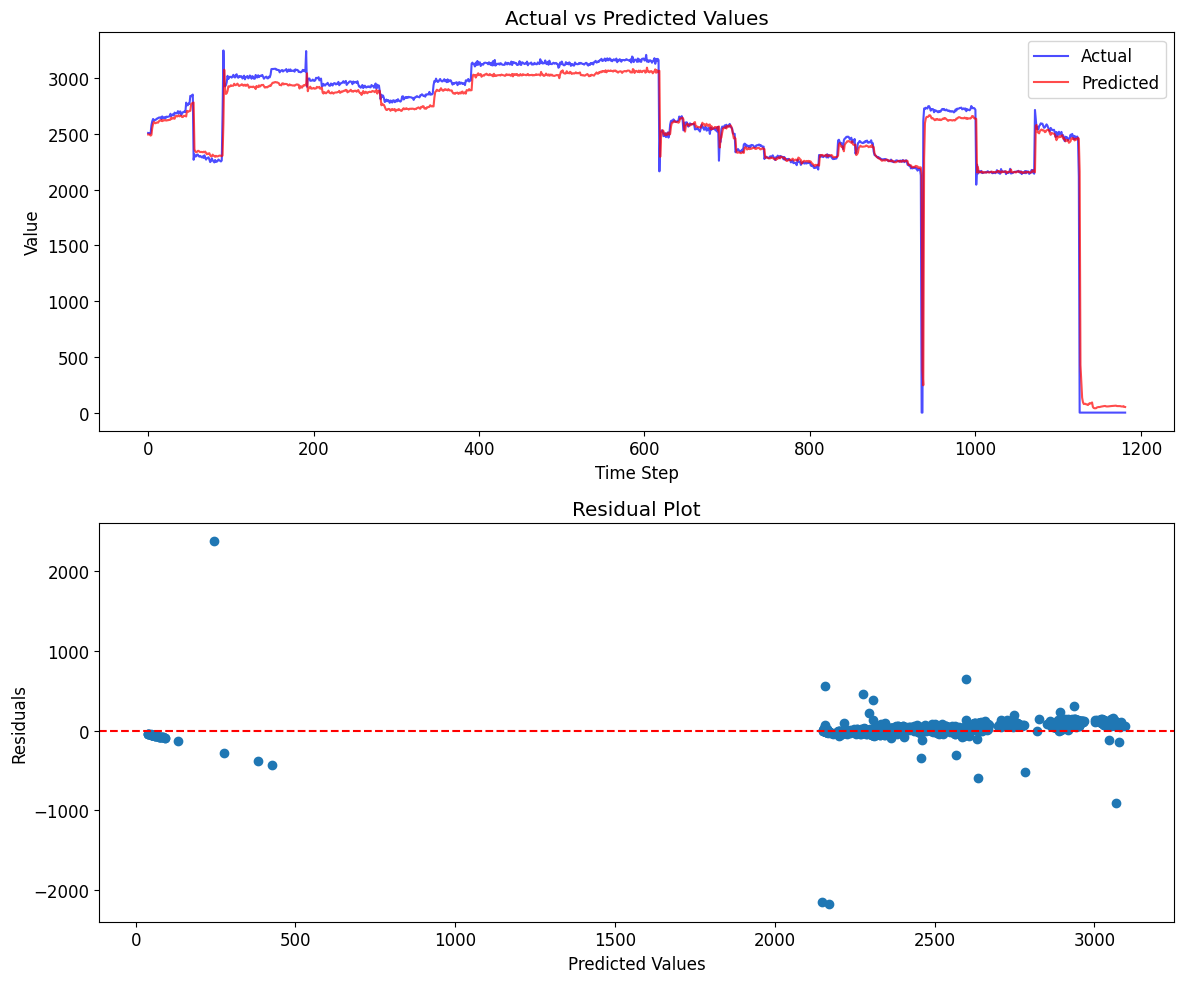

In [93]:
evaluate_and_predict(model, X_test, y_test, '2|CB')

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 8.774145856532357
RMSE: 2.9621184744254165
MAE: 2.135737092490426
R2 Score: 0.7462394571799368
MAPE: 8.189341329816504%


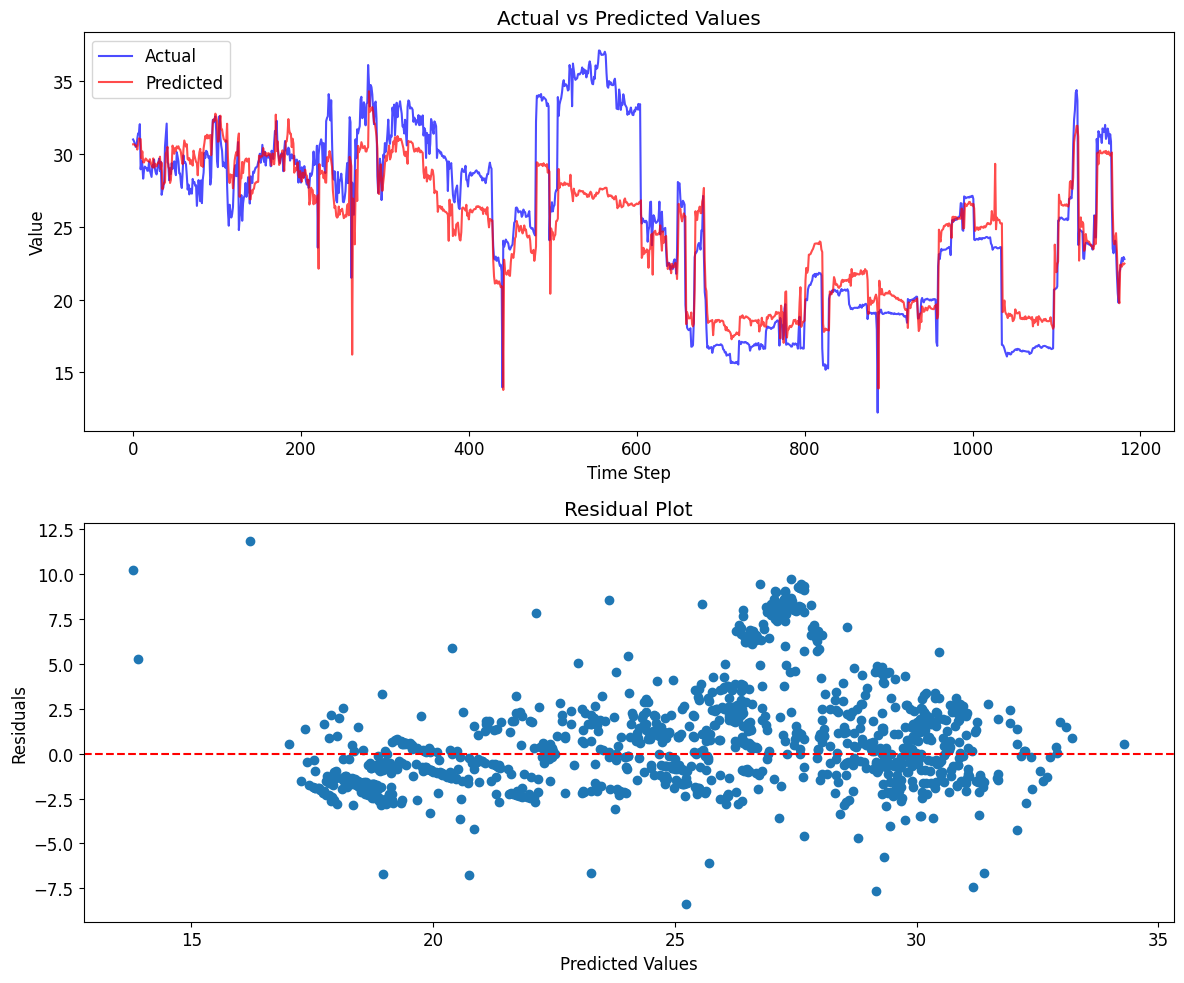

In [54]:

evaluate_and_predict(model, X_test, y_test, 'KD|Dampfmenge')

In [96]:
predictions = model.predict(X_test)
predictions_normalized = predictions

cb_index = features.index("2|CB")

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.column_stack((np.zeros((len(predictions), cb_index)), 
                                                        predictions, 
                                                        np.zeros((len(predictions), len(features)-cb_index-1)))))[:, cb_index]

y_test_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_test), cb_index)), 
                                                            y_test.reshape(-1, 1), 
                                                            np.zeros((len(y_test), len(features)-cb_index-1)))))[:, cb_index]

for x, y in zip (y_test_actual, predictions):
    print ("%.2f  -->  %.2f"  %  (x, y))

 1/37 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
2509.80  -->  2496.38
2508.46  -->  2496.35
2502.63  -->  2494.87
2506.68  -->  2485.90
2579.91  -->  2492.44
2615.40  -->  2555.11
2635.34  -->  2591.99
2621.45  -->  2608.58
2622.66  -->  2597.85
2630.62  -->  2596.91
2630.87  -->  2602.41
2640.76  -->  2602.97
2642.31  -->  2602.15
2648.41  -->  2613.40
2648.14  -->  2622.42
2650.74  -->  2621.53
2634.76  -->  2624.88
2658.41  -->  2615.42
2646.50  -->  2624.79
2643.79  -->  2621.73
2652.11  -->  2625.69
2641.02  -->  2623.71
2656.43  -->  2620.77
2653.53  -->  2625.09
2655.36  -->  2623.43
2657.78  -->  2627.67
2659.18  -->  2626.60
2682.03  -->  2629.42
2661.79  -->  2647.58
2669.54  -->  2638.69
2678.36  -->  2639.32
2666.95  -->  2645.84
2692.63  -->  2637.40
2685.17  -->  2660.33
2688.55  -->  2662.78
2685.33  -->  2657.64
2705.64  -->  2660.46
2683.18  -->  2668.31
2700.40  -->  2658.58
2703.02  -->  2664.71
2671.21  -->  2663.70
2682.68  -->  2652

In [42]:
# testing transformers:

n_classes = len(np.unique(y_train_full))
n_classes = 1

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

input_shape = X_train_full.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train_full,
    y_train_full,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5, 144)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 144)    │    593,040 │ input_layer_2[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 5, 144)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ dropout_27[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 5, 144)    │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 5, 4)      │        580 │ add_16[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 5, 4)      │          0 │ conv1d_16[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 5, 144)    │        720 │ dropout_28[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ conv1d_17[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 5, 144)    │          0 │ layer_normalizat… │
│                     │                   │            │ add_16[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 144)    │    593,040 │ add_17[0][0],     │
│ (MultiHeadAttentio… │                   │            │ add_17[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 5, 144)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ dropout_30[0][0]  │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 5, 144)    │          0 │ layer_normalizat… │
│                     │                   │            │ add_17[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 5, 4)      │        580 │ add_18[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 5, 4)      │          0 │ conv1d_18[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 5, 144)    │        720 │ dropout_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ conv1d_19[0][0]   │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 2,398,353 (9.15 MB)

 Trainable params: 2,398,353 (9.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


59/60 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0116

2024-11-04 20:39:22.963290: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
2024-11-04 20:39:22.963338: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 641, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1987, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_255949/2534559390.py", line 67, in <module>

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 344, in fit

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 432, in evaluate

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 85, in test_step

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 398, in _compute_loss

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/trainers/trainer.py", line 366, in compute_loss

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 618, in __call__

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/trainers/compile_utils.py", line 659, in call

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/home/ibai/.local/share/virtualenvs/chemical-Wq__vR1L/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_62771]

In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Add
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = LayerNormalization(epsilon=1e-6)(x)
    x = tf.keras.layers.Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1, activation="linear")(x)
    return Model(inputs, outputs)

# Example usage
#input_shape = (100, 10)  # (timesteps, features)
input_shape = X_train_full.shape[1:]
model = build_transformer_model(
    input_shape,
    head_size=64,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    dropout=0.1,
    mlp_dropout=0.1,
)

model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mae"],
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 5, 144)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ input_layer_3[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 144)    │    148,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_40          │ (None, 5, 144)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 5, 144)    │          0 │ dropout_40[0][0], │
│                     │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ add_24[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 5, 4)      │        580 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 5, 4)      │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 5, 144)    │        720 │ dropout_41[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_25 (Add)        │ (None, 5, 144)    │          0 │ dense_7[0][0],    │
│                     │                   │            │ add_24[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ add_25[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 144)    │    148,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 5, 144)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_26 (Add)        │ (None, 5, 144)    │          0 │ dropout_43[0][0], │
│                     │                   │            │ add_25[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 144)    │        288 │ add_26[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 5, 4)      │        580 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 5, 4)      │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 5, 144)    │        720 │ dropout_44[0][0]

 Total params: 693,681 (2.65 MB)

 Trainable params: 693,681 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(
    X_train_full,
    y_train_full,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=callbacks,
)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.5408 - mae: 0.5553 - val_loss: 0.1115 - val_mae: 0.2695
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0902 - mae: 0.2348 - val_loss: 0.0721 - val_mae: 0.1876
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0411 - mae: 0.1595 - val_loss: 0.0742 - val_mae: 0.2040
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0225 - mae: 0.1156 - val_loss: 0.0589 - val_mae: 0.1550
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0171 - mae: 0.0980 - val_loss: 0.0486 - val_mae: 0.1442
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0129 - mae: 0.0864 - val_loss: 0.0422 - val_mae: 0.1505
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0112 - mae: 0.0807 - val_loss: 0.0381 - val_mae: 0.1403
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0099 - mae: 0.0766 - val_loss: 0.0362 - val_mae: 0.1368
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - lo

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


ValueError: x and y must be the same size

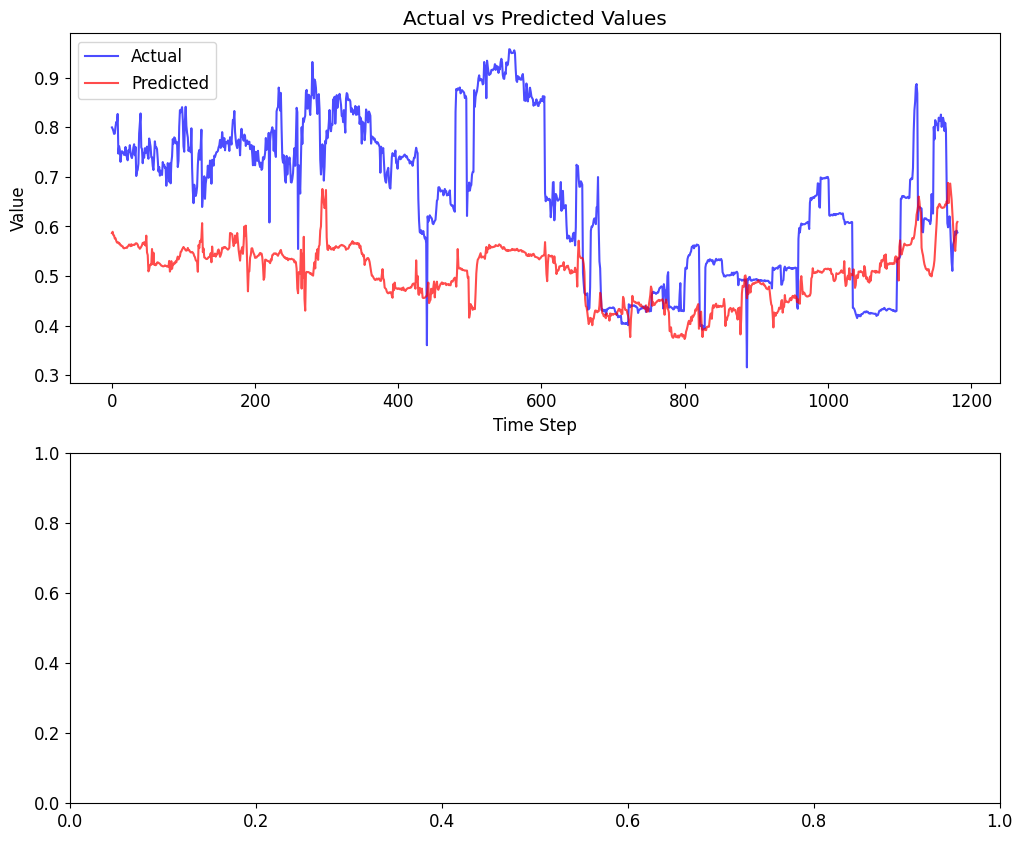

In [45]:
predictions = model.predict(X_test)
# Create a figure with 5 subplots
fig = plt.figure(figsize=(12, 10))

ax2 = fig.add_subplot(2, 1, 1)
ax2.plot(y_test, label='Actual', color='blue', alpha=0.7)
ax2.plot(predictions, label='Predicted', color='red', alpha=0.7)
ax2.set_title('Actual vs Predicted Values')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Value')
ax2.legend()

ax3 = fig.add_subplot(2, 1, 2)
residuals = y_test - predictions
ax3.scatter(predictions, residuals)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Residuals')
ax3.set_title('Residual Plot')

plt.savefig("figures/evaluation_test_transformers.pdf", dpi=300)


plt.tight_layout()
plt.show()


In [41]:
print (len(predictions))
print (len(predictions[0]))
print (len(y_test))
print (predictions)
print (y_test)
print(np.unique(y_train_full))

1182
1763
1182
[[9.9993712e-01 3.1666417e-08 2.3245414e-08 ... 2.2168875e-08
  8.9044692e-09 7.9368716e-09]
 [9.9993664e-01 3.1986922e-08 2.3383658e-08 ... 2.2376046e-08
  8.9555110e-09 7.9899536e-09]
 [9.9993604e-01 3.2337606e-08 2.3529854e-08 ... 2.2604238e-08
  9.0035304e-09 8.0646956e-09]
 ...
 [9.9992859e-01 3.8576658e-08 2.3297414e-08 ... 2.4044658e-08
  1.1047718e-08 1.0131113e-08]
 [9.9992859e-01 3.8703938e-08 2.3253509e-08 ... 2.4047456e-08
  1.1103022e-08 1.0103249e-08]
 [9.9992836e-01 3.8936498e-08 2.3303009e-08 ... 2.4153683e-08
  1.1205693e-08 1.0162443e-08]]
[0.79974194 0.79690323 0.79251613 ... 0.58374194 0.59148387 0.58787097]
[0.00000000e+00 2.58064516e-04 5.16129032e-04 ... 9.96903226e-01
 9.98451613e-01 1.00000000e+00]


In [31]:

evaluate_and_predict(model, X_test, y_test, 'KD|Dampfmenge')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


ValueError: operands could not be broadcast together with shapes (1182,1906) (144,) (1182,1906) 

In [ ]:
predictions = model.predict(X_test)
predictions_normalized = predictions

cb_index = features.index(target_variable)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.column_stack((np.zeros((len(predictions), cb_index)), 
                                                        predictions, 
                                                        np.zeros((len(predictions), len(features)-cb_index-1)))))[:, cb_index]

y_test_actual = scaler.inverse_transform(np.column_stack((np.zeros((len(y_test), cb_index)), 
                                                            y_test.reshape(-1, 1), 
                                                            np.zeros((len(y_test), len(features)-cb_index-1)))))[:, cb_index]

# Calculate metrics
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)
mape = np.mean(np.abs((y_test_actual - predictions) / y_test_actual)) * 100

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')
print(f'MAPE: {mape}%')

# Sort the actual test data and predictions
sorted_indices = np.argsort(y_test_actual)
y_test_sorted = y_test_actual[sorted_indices]
predictions_sorted = predictions[sorted_indices]

# Create a figure with 5 subplots
fig = plt.figure(figsize=(12, 10))

ax2 = fig.add_subplot(2, 1, 1)
ax2.plot(y_test_actual, label='Actual', color='blue', alpha=0.7)
ax2.plot(predictions, label='Predicted', color='red', alpha=0.7)
ax2.set_title('Actual vs Predicted Values')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Value')
ax2.legend()

ax3 = fig.add_subplot(2, 1, 2)
residuals = y_test_actual - predictions
ax3.scatter(predictions, residuals)
ax3.axhline(y=0, color='r', linestyle='--')
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Residuals')
ax3.set_title('Residual Plot')

plt.savefig("figures/evaluation_test.pdf", dpi=300)


plt.tight_layout()
plt.show()